In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Leyendo los datos y haciendo una limpieza:

In [40]:
tp=pd.read_csv("tp.csv",encoding='utf-8')

In [41]:
#camiando los nombre de columnas para una mejor comprensio
tp.rename(columns={"Pricing, Delivery_Terms_Quote_Appr":"Pri_Deli_Terms_Quote_Appr",\
                  "Pricing, Delivery_Terms_Approved":"Pri_Deli_Terms_Appr"},inplace=True)
#seteando en formato fecha la columna Account_Created_Date
tp.Account_Created_Date=pd.to_datetime(tp.Account_Created_Date)

Aca se analizara la cantidad de ventas hechas por territorio y Region:

Ahora paso a analizar las Regiones donde se produjeron estas ventas:

In [42]:
cant_vent_Region=tp.groupby("Region").agg({"Region":"count"}).\
rename(columns={"Region":"cant_vent_Region"}).\
sort_values("cant_vent_Region",ascending=False).head(25)

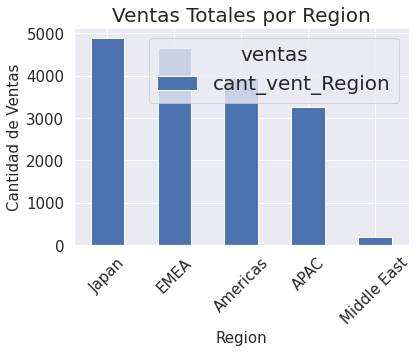

In [43]:
cant_vent_Region.plot(kind="bar",stacked=True, fontsize=15,rot=45,)
plt.title('Ventas Totales por Region', fontsize=20);
plt.xlabel('Region', fontsize=15);
plt.ylabel('Cantidad de Ventas', fontsize=15)
plt.legend(title="ventas", fontsize=20, title_fontsize=20)
plt.savefig('region_stage.png')

viendo que aparece como region Japon voy a analizar los datos de region:

In [44]:
tp.Territory=tp.where(tp.Territory.str.contains("None")==False & tp.Region.str.contains("None"),"Japan").Territory

In [45]:
tp.Territory.value_counts().reset_index().head(10)

,index,Territory
0,Japan,5680
1,Germany,1682
2,NW America,1568
3,Australia,1208
4,India,809
5,NE America,760
6,Netherlands,533
7,SE America,493
8,France,449
9,Singapore,441


In [46]:
tp.Territory=tp.where(tp.Territory.str.contains(" America")==False,"America").Territory

In [47]:
cant_vent_Territory=tp.groupby("Territory").agg({"Territory":"count"}).\
rename(columns={"Territory":"cant_vent_Territory"}).\
sort_values("cant_vent_Territory",ascending=False).head(25)

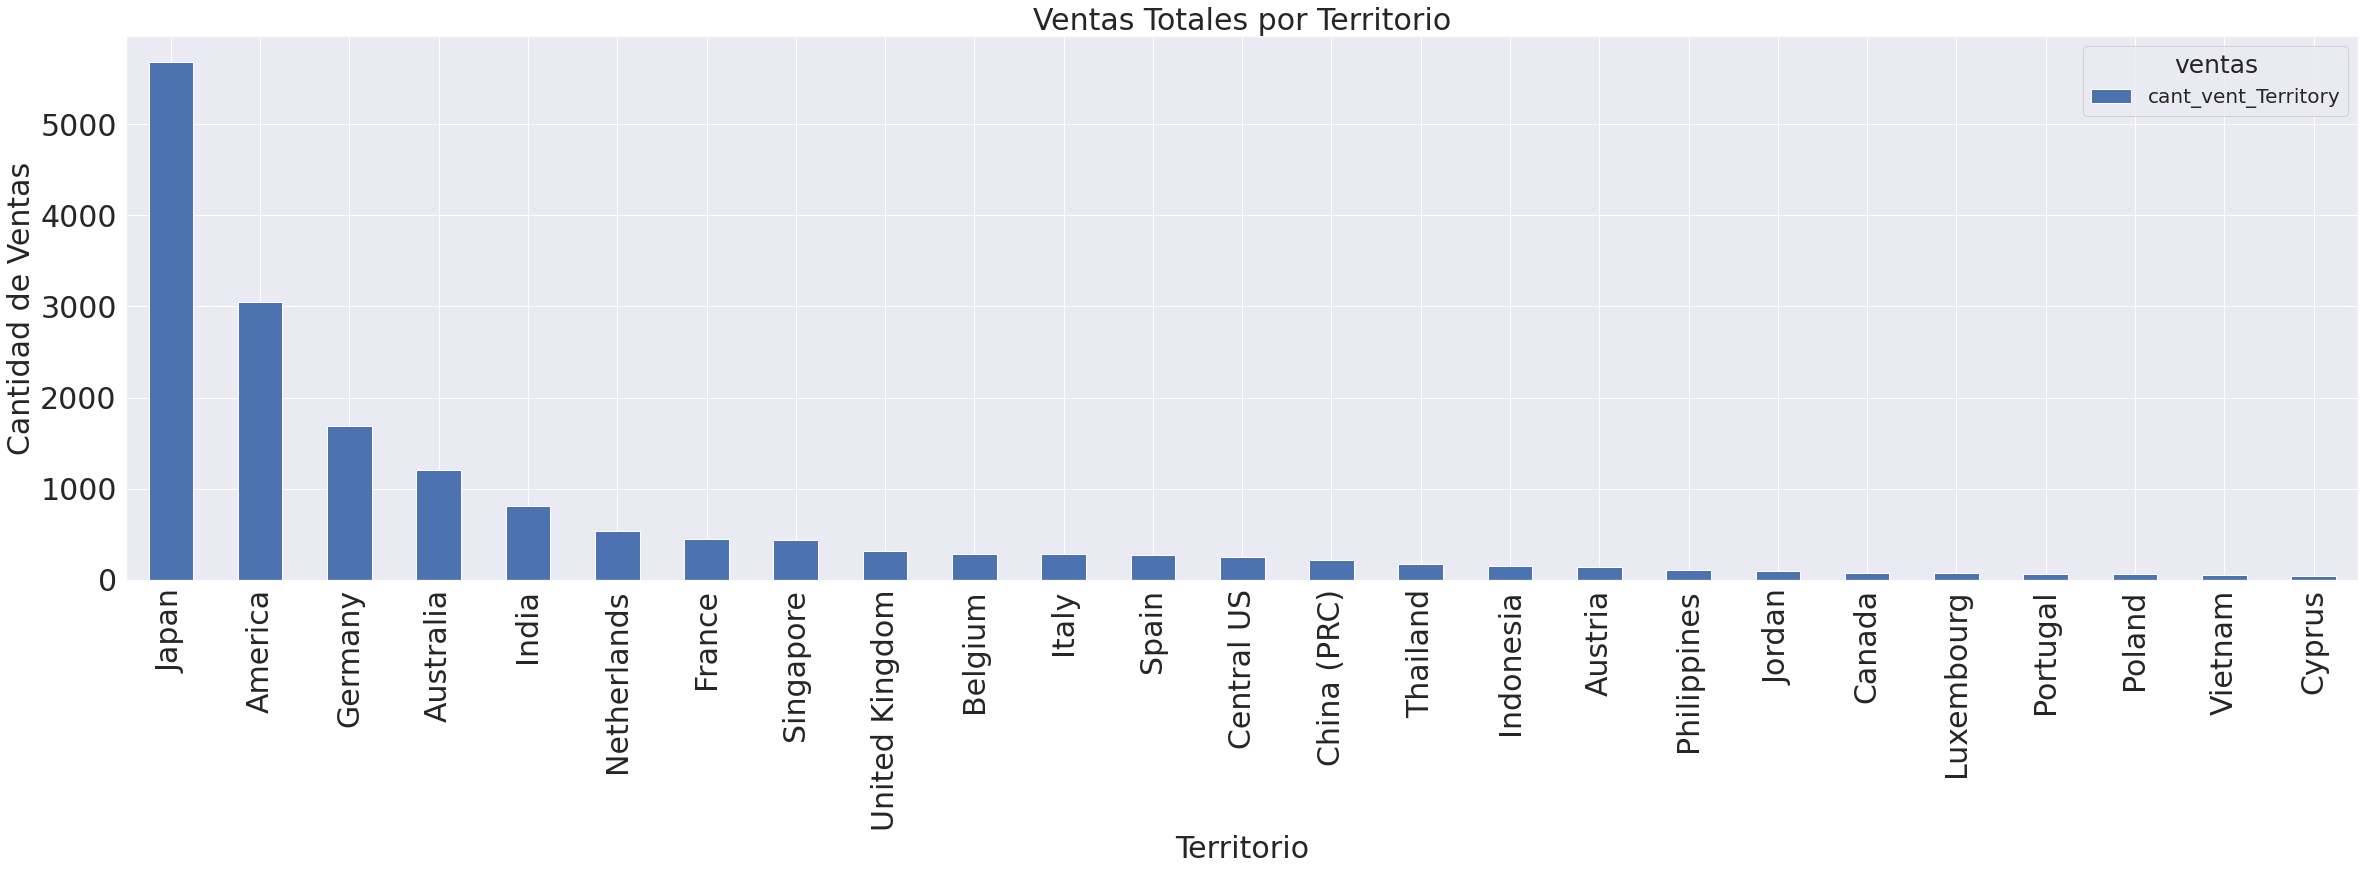

In [48]:
cant_vent_Territory.plot(kind="bar",stacked=True, fontsize=30,figsize=(40,10))
plt.title('Ventas Totales por Territorio', fontsize=30);
plt.xlabel('Territorio', fontsize=30);
plt.ylabel('Cantidad de Ventas', fontsize=30)
plt.legend(title="ventas", fontsize=20, title_fontsize=25)
plt.savefig('territorio_stage.png')

Podemos ver que las mayores ventas se producen en territorio Japones Aleman Americano Australiano indio, son aquellos lugares de donde podremos sacar mas informacion para 
las futuras predicciones.

In [49]:
tp_top10=tp.Territory.value_counts().reset_index().head(10)
tp_top10=tp_top10.rename(columns={"Territory":"cantidad_ventas","index":"Territory"})

In [50]:
tp_top10

,Territory,cantidad_ventas
0,Japan,5680
1,America,3045
2,Germany,1682
3,Australia,1208
4,India,809
5,Netherlands,533
6,France,449
7,Singapore,441
8,United Kingdom,313
9,Belgium,285


In [51]:
top10=tp[["Territory","Stage"]].merge(tp_top10,how="right",on="Territory")

In [52]:
tp_terri_Acconun=tp[["Territory","Account_Name","Stage"]].merge(tp_top10,how="right",on="Territory")

In [53]:
top10

,Territory,Stage,cantidad_ventas
0,Japan,Closed Lost,5680
1,Japan,Closed Won,5680
2,Japan,Closed Lost,5680
3,Japan,Closed Lost,5680
4,Japan,Closed Lost,5680
...,...,...,...
14440,Belgium,Closed Won,285
14441,Belgium,Closed Won,285
14442,Belgium,Closed Won,285
14443,Belgium,Closed Won,285


In [54]:
tp_terri_Acconun

,Territory,Account_Name,Stage,cantidad_ventas
0,Japan,Account_Name_619,Closed Lost,5680
1,Japan,Account_Name_619,Closed Won,5680
2,Japan,Account_Name_1888,Closed Lost,5680
3,Japan,Account_Name_1888,Closed Lost,5680
4,Japan,Account_Name_1888,Closed Lost,5680
...,...,...,...,...
14440,Belgium,Account_Name_350,Closed Won,285
14441,Belgium,Account_Name_350,Closed Won,285
14442,Belgium,Account_Name_1100,Closed Won,285
14443,Belgium,Account_Name_1274,Closed Won,285


In [55]:
top10_reset=top10.groupby(["Territory","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cantidad_stage"}).reset_index()

In [56]:
top10_reset

,Territory,Stage,cantidad_stage
0,America,Closed Lost,1567
1,America,Closed Won,1465
2,America,Negotiation,8
3,America,Proposal,5
4,Australia,Closed Lost,506
5,Australia,Closed Won,696
6,Australia,Proposal,4
7,Australia,Qualification,2
8,Belgium,Closed Lost,98
9,Belgium,Closed Won,187


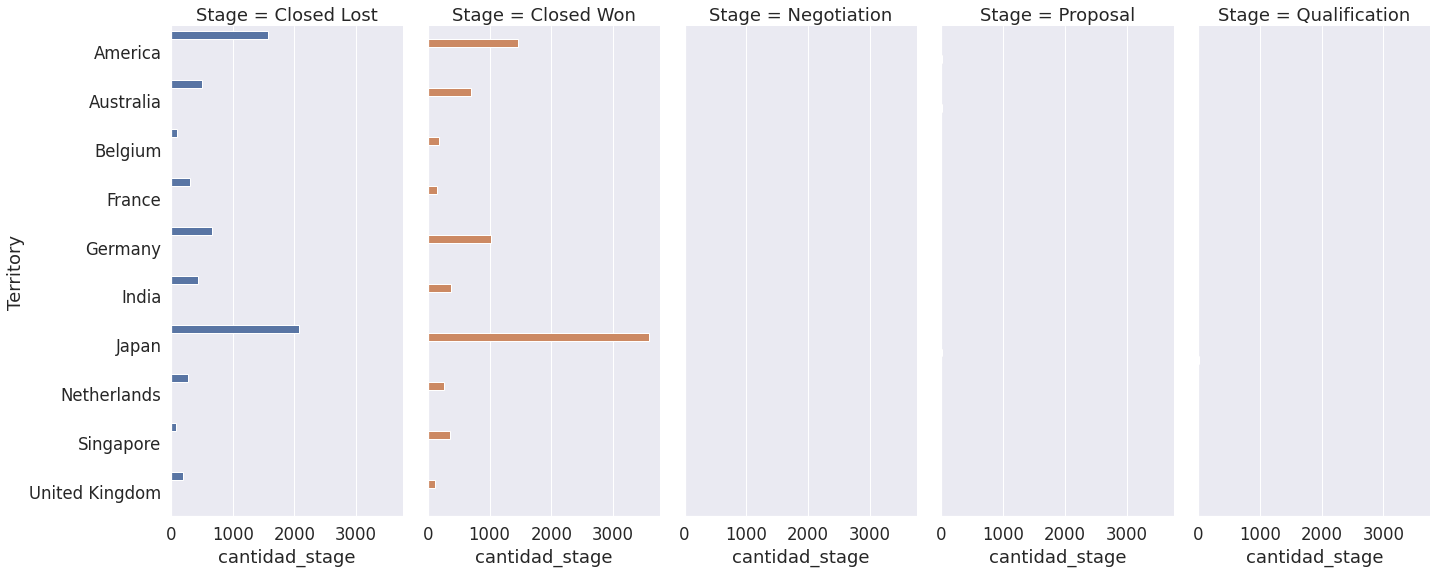

In [57]:
sns.set(font_scale=1.5) 
sns.catplot(x="cantidad_stage",y="Territory",col="Stage",\
    data=top10_reset,hue="Stage",kind="bar",height=8, aspect=.5)

In [58]:
top10_reset_r=top10_reset.loc[top10_reset.Stage.str.contains("Closed Lost")|top10_reset.Stage.str.contains("Closed Won")]

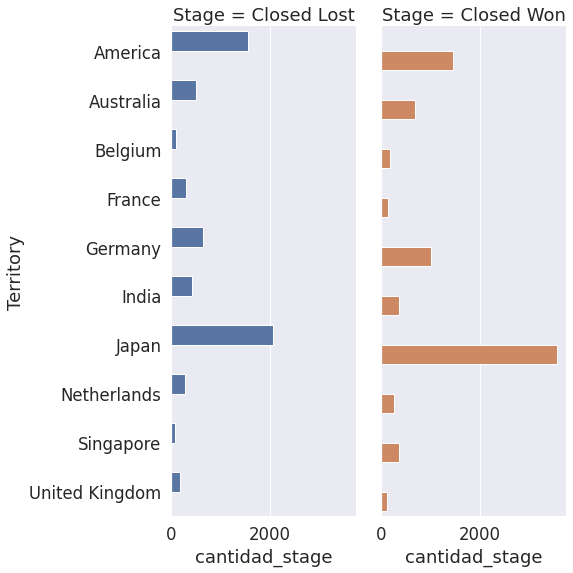

In [59]:
sns.set(font_scale=1.5) 
sns.catplot(x="cantidad_stage",y="Territory",col="Stage",\
    data=top10_reset_r,hue="Stage",kind="bar",height=8, aspect=.5)

Puedo concluir que no puedo sacar informacion de los estados que no sean Closed Lost y Won .. como se puede apreciar
Japon es el pais con el que mas ventas hemos realizado pero tenemos si bien es mucho menor a las ganadas varias 
ventas perdidas, por otro lado vemos que Francia y America son los paises en los que hemos perdido mas ventas que ganadas
y en singapur las ventas hechas has sido mucho mas exitosas en proporcion al resto.

In [60]:
Stage_por_Region=tp.groupby(["Region","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cantidad_ventas_Stage"}).reset_index()

In [61]:
#Stage_por_Region_desviacion=Stage_por_Region.groupby('Region').agg({'cantidad_ventas_Stage':"max"}).rename(columns={"cantidad_ventas_Stage":"max_cant_Region"}).reset_index()

NORMALIZE

In [62]:
from sklearn.preprocessing import normalize

In [63]:
Stage_por_Region

,Region,Stage,cantidad_ventas_Stage
0,APAC,Closed Lost,1355
1,APAC,Closed Won,1896
2,APAC,Proposal,8
3,APAC,Qualification,3
4,Americas,Closed Lost,2140
5,Americas,Closed Won,1793
6,Americas,Negotiation,8
7,Americas,Proposal,4
8,EMEA,Closed Lost,2189
9,EMEA,Closed Won,2471


In [64]:
Stage_por_Region["data_normalize"]=normalize(Stage_por_Region[["cantidad_ventas_Stage"]], axis=0)

In [65]:
Stage_por_Region_md_p=Stage_por_Region.pivot_table(columns="Stage",fill_value=0,index="Region",values="data_normalize")

In [66]:
Stage_por_Region_md_p

Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Region,,,,,
APAC,0.221056,0.309316,0.000000,0.001305,0.000489
Americas,0.349122,0.292512,0.001305,0.000653,0.000000
EMEA,0.357116,0.403122,0.000163,0.000489,0.000000
Japan,0.252216,0.542118,0.000163,0.002284,0.001305
Middle East,0.019577,0.008157,0.001305,0.000979,0.000000


<AxesSubplot:xlabel='Stage', ylabel='Region'>

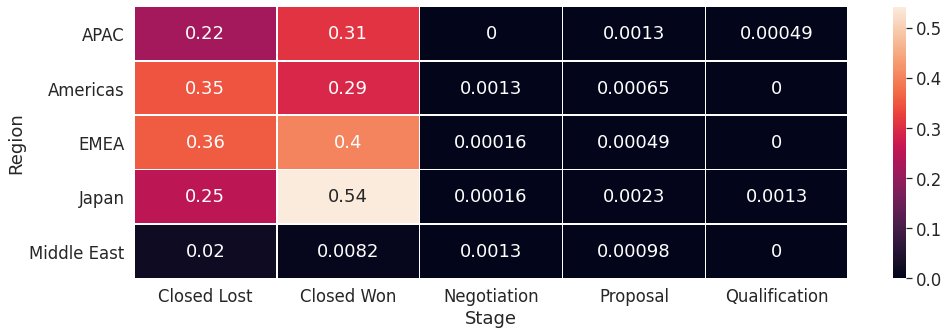

In [67]:
plt.figure(figsize = (16,5))

sns.heatmap(Stage_por_Region_md_p,annot=True,linewidths=.5)

In [68]:
Stage_por_Region_md_p_r=Stage_por_Region_md_p.reset_index()[["Region","Closed Lost","Closed Won"]]

In [69]:
Stage_por_Region_md_p_r

Stage,Region,Closed Lost,Closed Won
0,APAC,0.221056,0.309316
1,Americas,0.349122,0.292512
2,EMEA,0.357116,0.403122
3,Japan,0.252216,0.542118
4,Middle East,0.019577,0.008157


In [70]:
Stage_por_Region_md_p_r=Stage_por_Region_md_p_r.set_index("Region")

<AxesSubplot:xlabel='Region'>

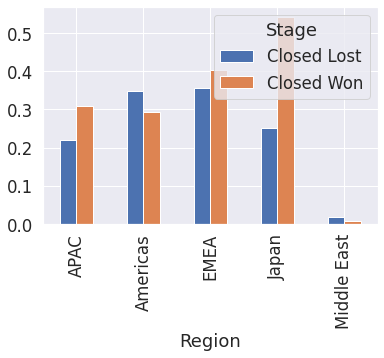

In [71]:
Stage_por_Region_md_p_r.plot(kind='bar')

CON LOS DATOS NORMALIZADO PODEMOS DARNOS CUENTA QUE NO SERIA RELEVANTE ESTUDIAR LOS CASOS DE VENTAS 
CON NEGOCIACIONES QUE QUEDARON INTERMEDIA PUES DE ESTAS TENEMOS MUY POCA INFORMACION
Y LO UNICO QUE NOS GENERARIA SERIA UN RUIDO EN EL ANALISIS DE DATOS.TAMBIEN SE PUEDE 
APRECIAR QUE LA REGION DE JAPON EMEA Y APAC SON LAS QUE POSEEN MAYOR PROBABILIDAD DE TERMINAR
DE FORMA EXITOSA, Y QUE EN LA REGION DE MIDDLE EAST EN MUCHO MAS PROBABLE PERDER 
LA VENTA POR MUCHO aunque lastimosamante a vista no se pueda determinar la diferencia.

In [72]:
tp.groupby(["Account_Created_Date","Account_Name","Stage"]).agg({"Account_Name":"count"}).rename(columns={"Account_Name":"count_date_Account_Name"}).sort_values("count_date_Account_Name",ascending=False).head(30)

count_date_Account_Name
Account_Created_Date Account_Name      Stage                               
2015-04-20           Account_Name_1888 Closed Lost                     1104
                                       Closed Won                      1018
                     Account_Name_1836 Closed Won                       795
2013-07-27           Account_Name_25   Closed Won                       539
2013-09-23           Account_Name_1991 Closed Won                       520
2015-12-21           Account_Name_1508 Closed Won                       323
2013-07-27           Account_Name_25   Closed Lost                      213
                     Account_Name_263  Closed Won                       205
2014-09-19           Account_Name_1642 Closed Won                       204
2016-01-29           Account_Name_931  Closed Won                       203
2014-09-19           Account_Name_1642 Closed Lost                      193
2013-07-27           Account_Name_533  Closed Won                       190
2013-10-03           Account_Name_1440 Closed Won                       177
2016-09-28           Account_Name_660  Closed Won                       150
2013-07-27           Account_Name_1994 Closed Won                       139
                     Account_Name_1274 Closed Won                       124
                     Account_Name_1693 Closed Won                       118
2013-09-05           Account_Name_1757 Closed Won                        96
2013-07-27           Account_Name_533  Closed Lost                       93
2015-04-20           Account_Name_1836 Closed Lost                       91
2015-10-30           Account_Name_501  Closed Won                        90
2013-07-28           Account_Name_1440 Closed Won                        90
2016-03-03           Account_Name_271  Closed Won                        87
2016-04-18           Account_Name_1411 Closed Won                        87
2013-07-28           Account_Name_1075 Closed Won                        86
2013-07-27           Account_Name_1448 Closed Won                        85
2016-07-11           Account_Name_1468 Closed Won                        82
2016-09-28           Account_Name_660  Closed Lost                       81
2015-12-17           Account_Name_686  Closed Won                        76
2015-04-21           Account_Name_1794 Closed Won                        74

In [73]:
tp.Account_Name.value_counts()

Account_Name_1888    2124
Account_Name_1836     886
Account_Name_25       752
Account_Name_1991     586
Account_Name_1642     397
                     ... 
Account_Name_372        1
Account_Name_386        1
Account_Name_683        1
Account_Name_1585       1
Account_Name_2073       1
Name: Account_Name, Length: 1635, dtype: int64

In [74]:
tp["Account_Created_Date_year"]=tp.Account_Created_Date.dt.year
tp["Account_Created_Date_month"]=tp.Account_Created_Date.dt.month
tp["Account_Created_Date_count"]=tp.Account_Created_Date.dt.month

In [75]:
tp["Account_Created_Date_year"].value_counts()

2015    4927
2013    4550
2016    3115
2017    2210
2014    1381
2018     764
Name: Account_Created_Date_year, dtype: int64

In [76]:
tp_Account_Name_year_stage_count=tp.groupby(["Account_Name","Account_Created_Date_year","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"count_stage"}).reset_index()#.sort_values("count_stage",ascending=False)

In [77]:
tp_Account_Name_year_stage_count

,Account_Name,Account_Created_Date_year,Stage,count_stage
0,Account_Name_0,2016,Closed Won,1
1,Account_Name_1,2016,Closed Lost,1
2,Account_Name_10,2016,Closed Lost,1
3,Account_Name_100,2018,Closed Won,1
4,Account_Name_100,2018,Proposal,1
...,...,...,...,...
2101,Account_Name_994,2016,Closed Won,4
2102,Account_Name_996,2017,Closed Lost,1
2103,Account_Name_997,2016,Closed Lost,1
2104,Account_Name_998,2018,Closed Won,1


In [78]:
tp_Account_Name_year_stage_count=tp_Account_Name_year_stage_count.sort_values("count_stage",ascending=False)

In [79]:
tp_Account_Name_year_stage_count_lost=tp_Account_Name_year_stage_count.loc[tp_Account_Name_year_stage_count.Stage.str.contains("Closed Lost")].head(15)
tp_Account_Name_year_stage_count_won=tp_Account_Name_year_stage_count.loc[tp_Account_Name_year_stage_count.Stage.str.contains("Closed Won")].head(15)

In [80]:
tp_Account_Name_year_stage_count_won
tp_Account_Name_year_stage_count_won["count_stage"]=normalize(tp_Account_Name_year_stage_count_won[["count_stage"]], axis=0)

In [81]:
tp_Account_Name_year_stage_count_lost
tp_Account_Name_year_stage_count_lost["count_stage"]=normalize(tp_Account_Name_year_stage_count_lost[["count_stage"]], axis=0)

In [82]:
tp_Account_Name_year_stage_count_lost=tp_Account_Name_year_stage_count_lost.rename(columns={"Account_Created_Date_year":"Year",\
                                "count_stage":"Ventas Perdidas"})
tp_Account_Name_year_stage_count_won=tp_Account_Name_year_stage_count_won.rename(columns={"Account_Created_Date_year":"Year",\
                                "count_stage":"Ventas Exitosas"})

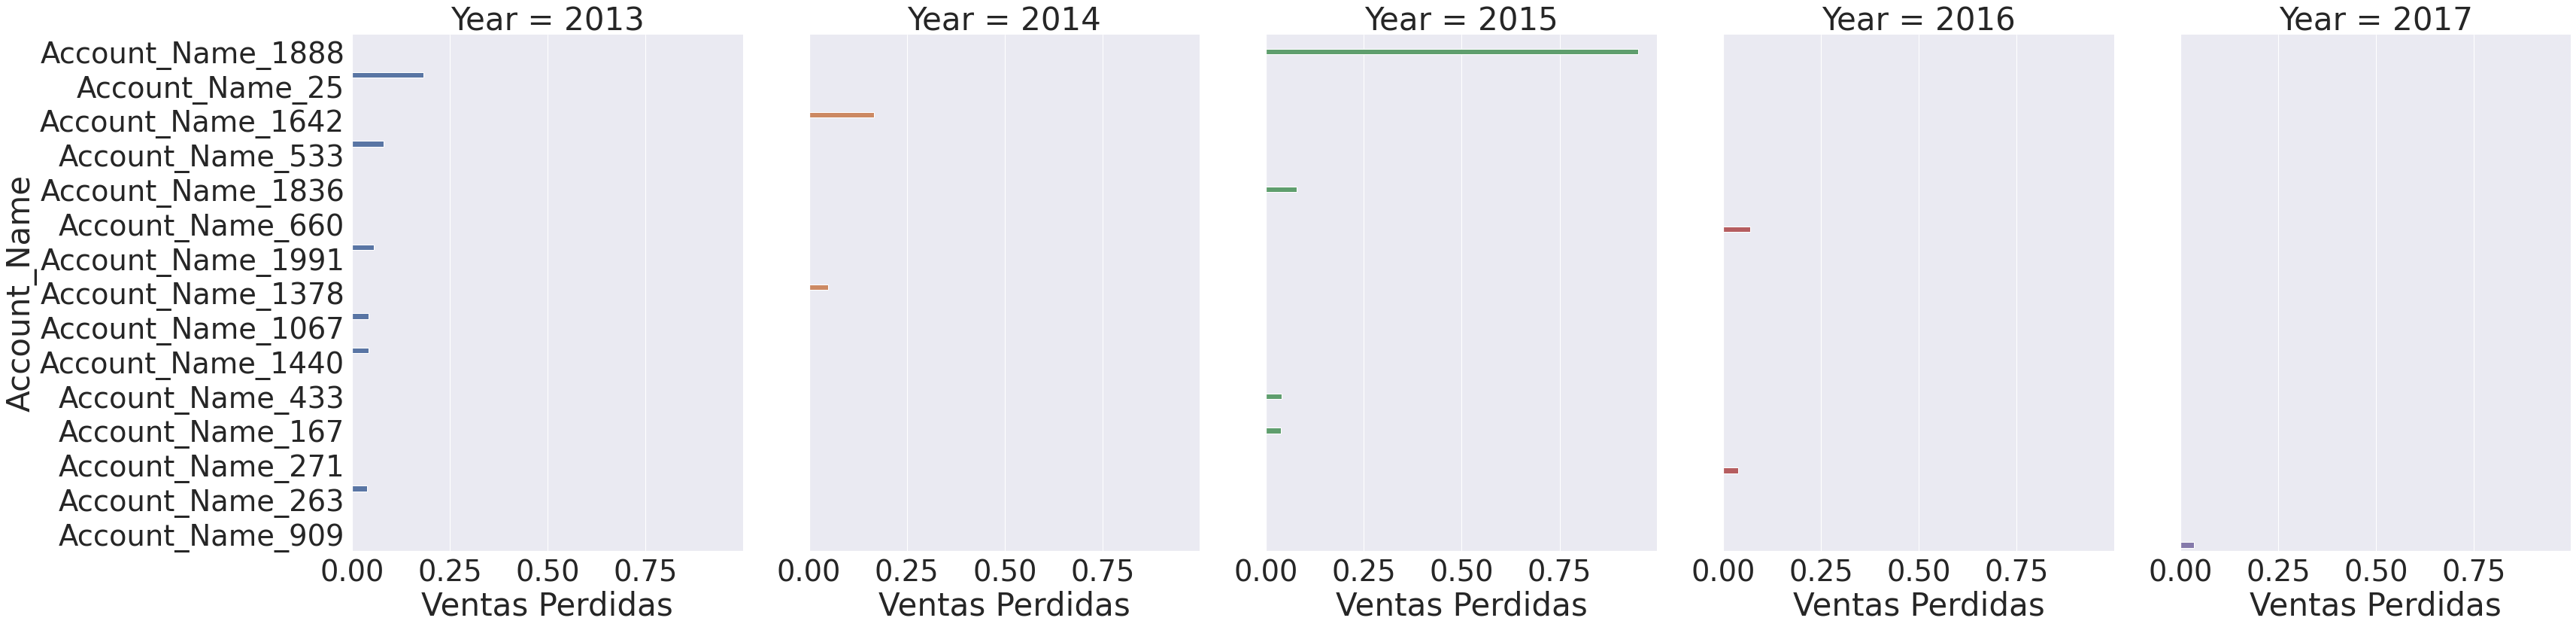

In [83]:
sns.set(font_scale=3.5) 
ax=sns.catplot(x="Ventas Perdidas",y="Account_Name",col="Year",\
data=tp_Account_Name_year_stage_count_lost,hue="Year",kind="bar",height=12, aspect=0.8)

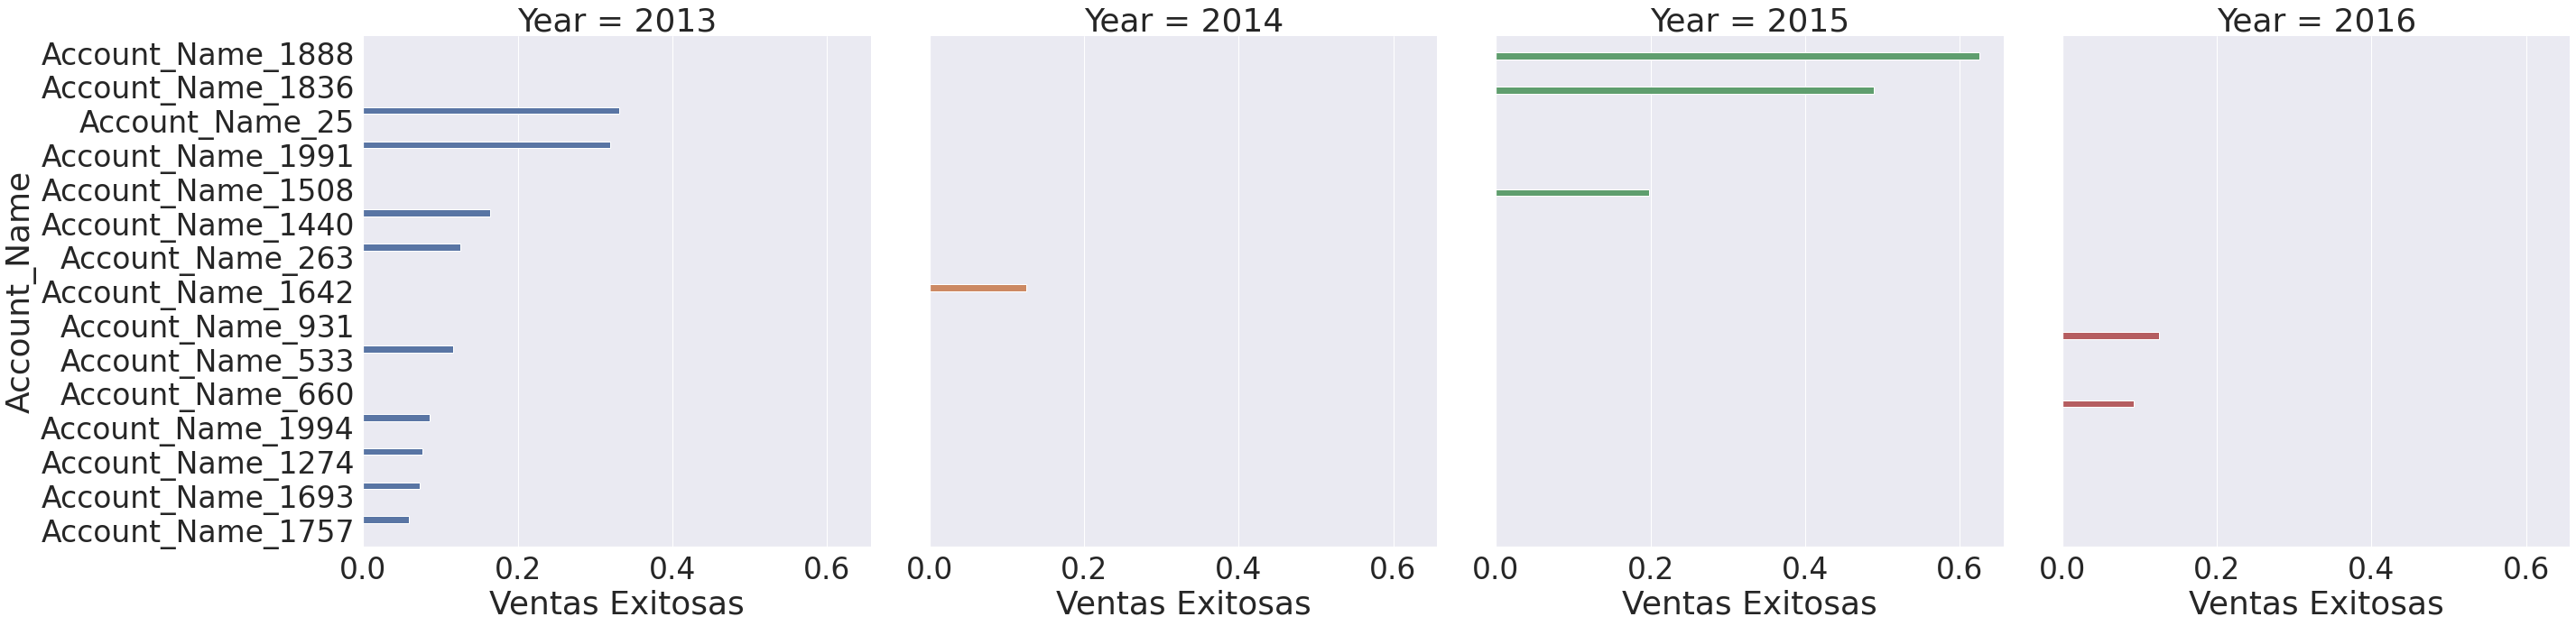

In [84]:
sns.set(font_scale=3) 
g=sns.catplot(x="Ventas Exitosas",y="Account_Name",col="Year",\
    data=tp_Account_Name_year_stage_count_won,hue="Year",kind="bar",height=10, aspect=1)
plt.show()

In [85]:
tp_Account_Name_year_stage_count_2013=tp_Account_Name_year_stage_count.loc[tp_Account_Name_year_stage_count.Account_Created_Date_year==2013].sort_values("count_stage",ascending=False).head(20)

In [86]:
tp_Account_Name_year_stage_count_2013

,Account_Name,Account_Created_Date_year,Stage,count_stage
1277,Account_Name_25,2013,Closed Won,539
1134,Account_Name_1991,2013,Closed Won,520
504,Account_Name_1440,2013,Closed Won,267
1276,Account_Name_25,2013,Closed Lost,213
1291,Account_Name_263,2013,Closed Won,205
1595,Account_Name_533,2013,Closed Won,190
1138,Account_Name_1994,2013,Closed Won,139
313,Account_Name_1274,2013,Closed Won,124
804,Account_Name_1693,2013,Closed Won,118
881,Account_Name_1757,2013,Closed Won,96


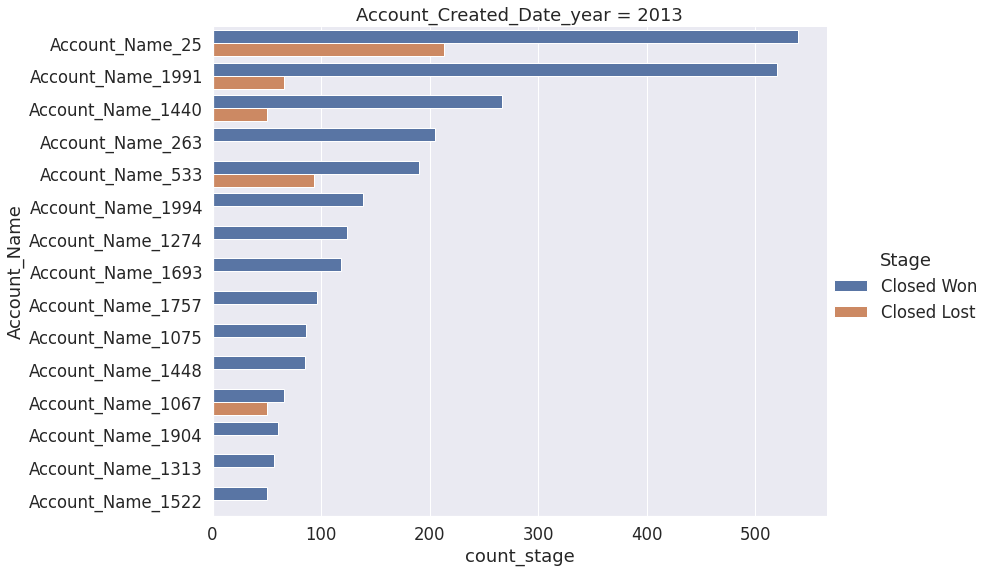

In [87]:
sns.set(font_scale=1.5) 
sns.catplot(x="count_stage",y="Account_Name",col="Account_Created_Date_year",\
    data=tp_Account_Name_year_stage_count_2013,hue="Stage",kind="bar",height=8, aspect=1.5)

In [88]:
tp_Account_Name_year_stage_count_2015=tp_Account_Name_year_stage_count.loc[tp_Account_Name_year_stage_count.Account_Created_Date_year==2015].sort_values("count_stage",ascending=False).head(20)

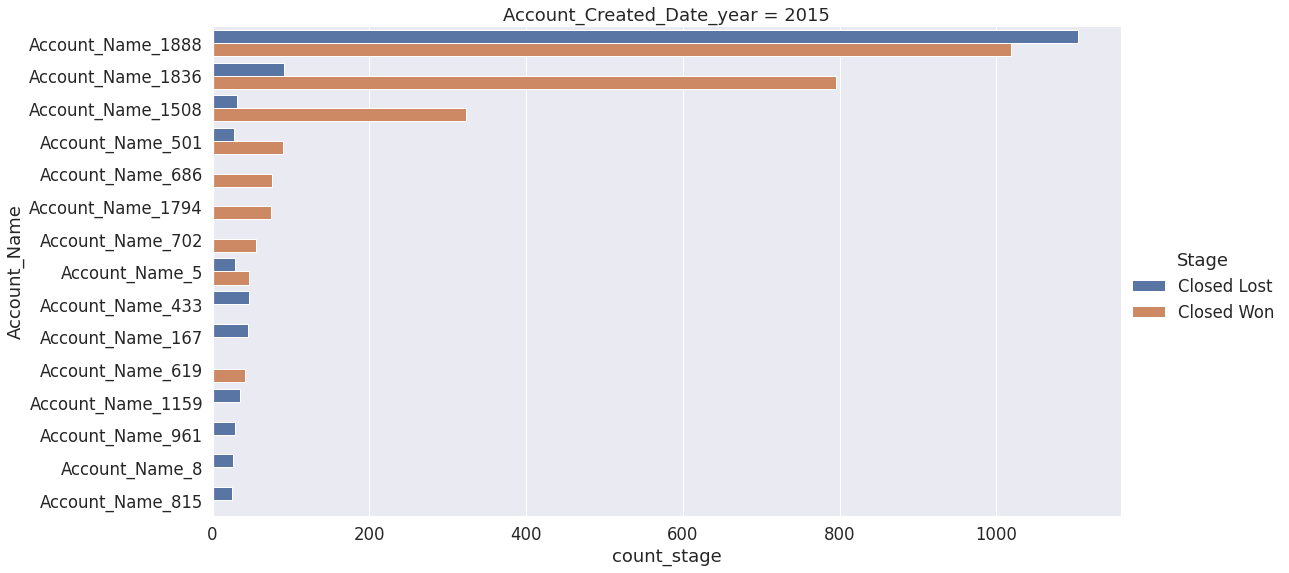

In [89]:
sns.set(font_scale=1.5) 
sns.catplot(x="count_stage",y="Account_Name",col="Account_Created_Date_year",\
    data=tp_Account_Name_year_stage_count_2015,hue="Stage",kind="bar",height=8, aspect=2)

In [229]:
tp_Account_Name_year_stage_count_2016=tp_Account_Name_year_stage_count.loc[tp_Account_Name_year_stage_count.Account_Created_Date_year==2016].sort_values("count_stage",ascending=False).head(20)

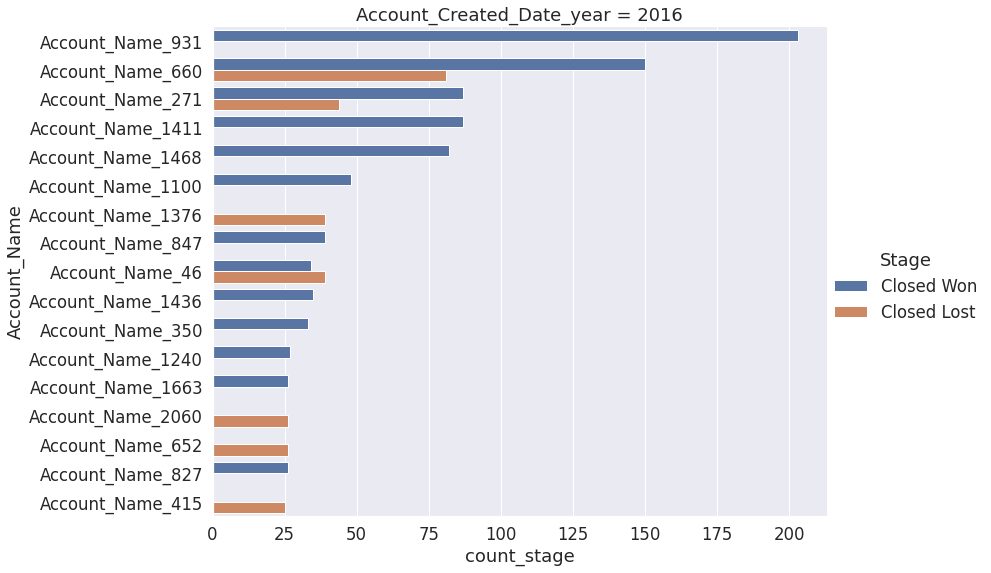

In [230]:
sns.set(font_scale=1.5) 
sns.catplot(x="count_stage",y="Account_Name",col="Account_Created_Date_year",\
    data=tp_Account_Name_year_stage_count_2016,hue="Stage",kind="bar",height=8, aspect=1.5)

In [96]:
tp_Account_Name_year_stage_count_2017=tp_Account_Name_year_stage_count.loc[tp_Account_Name_year_stage_count.Account_Created_Date_year==2017].sort_values("count_stage",ascending=False).head(20)

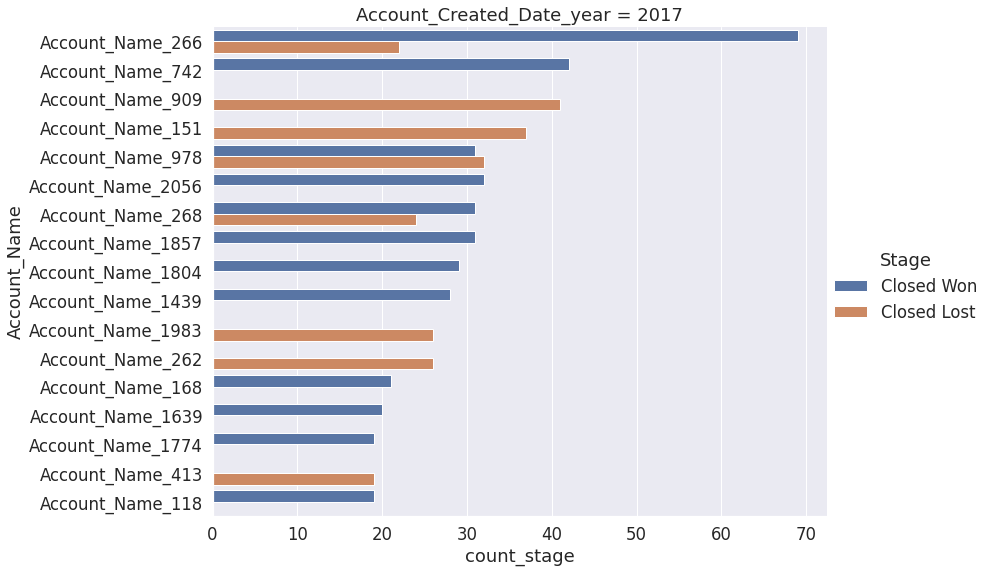

In [97]:
sns.set(font_scale=1.5) 
sns.catplot(x="count_stage",y="Account_Name",col="Account_Created_Date_year",\
    data=tp_Account_Name_year_stage_count_2017,hue="Stage",kind="bar",height=8, aspect=1.5)

Puedo notar que los clientes del 2013 son con los que mas hemos tenigos ventas exitosas pero nuestro cliente mas grande
es el cliente 1836 ya que con el hemos tenido la mayor cantidad de ventas exitos por otro lado el cliente 1888 
es con el que hemos tenido si bien una gran cantidad de ventas exitosas 
tambien una gran cantidad de ventas perdidas.

In [98]:
tp["Submitted_for_Approval"].value_counts().head(25)

0    16947
Name: Submitted_for_Approval, dtype: int64

Submitted_for_Approval analizando este dato podemos ver que todas las ventas que fueron enviadas para su aprobacion
entonce no puedo sacar alguna conclucion 

In [99]:
tp["Bureaucratic_Code_0_Approved"].value_counts().head(25)

0    11543
1     5404
Name: Bureaucratic_Code_0_Approved, dtype: int64

In [100]:
tp["Bureaucratic_Code_0_Approval"].value_counts().head(25)

0    8889
1    8058
Name: Bureaucratic_Code_0_Approval, dtype: int64

In [101]:
tp_code_Bureaucratic_0=tp.groupby(["Bureaucratic_Code_0_Approval","Bureaucratic_Code_0_Approved","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cantidad_stage"}).reset_index()

In [102]:
tp_code_Bureaucratic_0

,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Stage,cantidad_stage
0,0,0,Closed Lost,2961
1,0,0,Closed Won,5928
2,1,0,Closed Lost,1846
3,1,0,Closed Won,787
4,1,0,Negotiation,1
5,1,0,Proposal,9
6,1,0,Qualification,11
7,1,1,Closed Lost,2543
8,1,1,Closed Won,2818
9,1,1,Negotiation,17


In [103]:
tp_code_Bureaucratic_0=tp_code_Bureaucratic_0.loc[tp_code_Bureaucratic_0.Stage.str.contains("Closed Lost")|tp_code_Bureaucratic_0.Stage.str.contains("Closed Won")].rename(columns={"Bureaucratic_Code_0_Approval":"Requiere Code 0","Bureaucratic_Code_0_Approved":"Aprobado Code 0"})

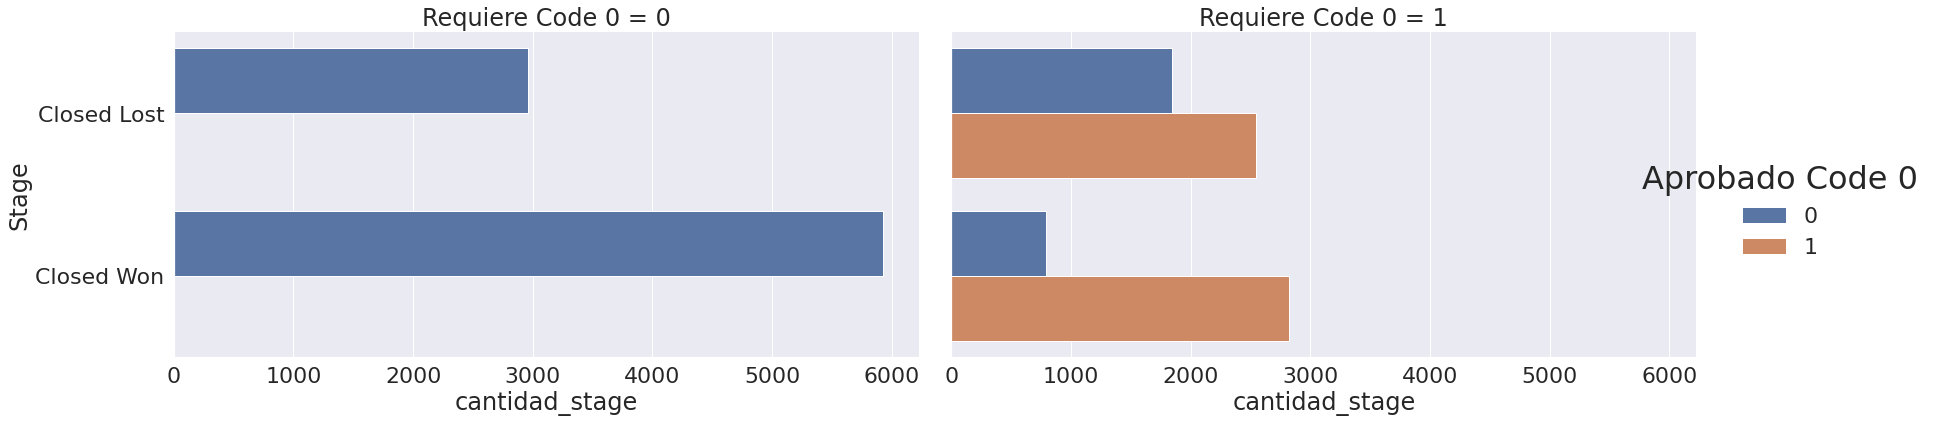

In [104]:
sns.set(font_scale=2) 
g=sns.catplot(x="cantidad_stage",y="Stage",col="Requiere Code 0",\
    data=tp_code_Bureaucratic_0,hue="Aprobado Code 0",kind="bar",height=6, aspect=2)

plt.setp(g._legend.get_texts(), fontsize=22)
plt.setp(g._legend.get_title(), fontsize=32)
plt.show()

In [105]:
tp["Bureaucratic_Code"].value_counts().head(25)

Bureaucratic_Code_4    12587
Bureaucratic_Code_5     3803
Bureaucratic_Code_1      261
Bureaucratic_Code_2      242
Bureaucratic_Code_0       51
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

In [106]:
Bureaucratic_Code_Stage_Count=tp[["Bureaucratic_Code","Stage"]].loc[tp.Stage.str.contains("Closed Lost")|tp.Stage.str.contains("Closed Won")].groupby(["Bureaucratic_Code","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"Bureaucratic_Code_Stage_Count"}).reset_index()

In [107]:
Bureaucratic_Code_Stage_Count

,Bureaucratic_Code,Stage,Bureaucratic_Code_Stage_Count
0,Bureaucratic_Code_0,Closed Won,51
1,Bureaucratic_Code_1,Closed Lost,159
2,Bureaucratic_Code_1,Closed Won,102
3,Bureaucratic_Code_2,Closed Lost,128
4,Bureaucratic_Code_2,Closed Won,114
5,Bureaucratic_Code_3,Closed Lost,1
6,Bureaucratic_Code_3,Closed Won,1
7,Bureaucratic_Code_4,Closed Lost,4291
8,Bureaucratic_Code_4,Closed Won,8253
9,Bureaucratic_Code_5,Closed Lost,2771


In [108]:
#Bureaucratic_Code_Stage_Count_norm["Bureaucratic_Code_Stage_Count_normalize"]=(Bureaucratic_Code_Stage_Count_norm["Bureaucratic_Code_Stage_Count"]-Bureaucratic_Code_Stage_Count_norm["Bureaucratic_Code_Stage_Count_min"])/(Bureaucratic_Code_Stage_Count_norm["Bureaucratic_Code_Stage_Count_max"]-Bureaucratic_Code_Stage_Count_norm["Bureaucratic_Code_Stage_Count_min"])
Bureaucratic_Code_Stage_Count["data_normalize"]=normalize(Bureaucratic_Code_Stage_Count[["Bureaucratic_Code_Stage_Count"]], axis=0)

In [109]:
Bureaucratic_Code_Stage_Count

,Bureaucratic_Code,Stage,Bureaucratic_Code_Stage_Count,data_normalize
0,Bureaucratic_Code_0,Closed Won,51,0.005224
1,Bureaucratic_Code_1,Closed Lost,159,0.016288
2,Bureaucratic_Code_1,Closed Won,102,0.010449
3,Bureaucratic_Code_2,Closed Lost,128,0.013112
4,Bureaucratic_Code_2,Closed Won,114,0.011678
5,Bureaucratic_Code_3,Closed Lost,1,0.000102
6,Bureaucratic_Code_3,Closed Won,1,0.000102
7,Bureaucratic_Code_4,Closed Lost,4291,0.439570
8,Bureaucratic_Code_4,Closed Won,8253,0.845438
9,Bureaucratic_Code_5,Closed Lost,2771,0.283861


In [110]:
Bureaucratic_Code_Stage_Count_normalize_p=Bureaucratic_Code_Stage_Count.pivot_table(index="Stage",fill_value=0,columns="Bureaucratic_Code",values="data_normalize")

<AxesSubplot:xlabel='Bureaucratic_Code', ylabel='Stage'>

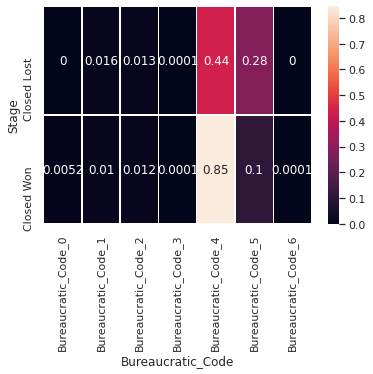

In [111]:
sns.set(font_scale=1) 
sns.heatmap(Bureaucratic_Code_Stage_Count_normalize_p,annot=True,linewidths=.5)

In [112]:
Bureaucratic_Code_Stage_Count_mayor_200=Bureaucratic_Code_Stage_Count.loc[Bureaucratic_Code_Stage_Count["Bureaucratic_Code_Stage_Count"]>200]

In [113]:
Bureaucratic_Code_Stage_Count_mayor_200

,Bureaucratic_Code,Stage,Bureaucratic_Code_Stage_Count,data_normalize
7,Bureaucratic_Code_4,Closed Lost,4291,0.439570
8,Bureaucratic_Code_4,Closed Won,8253,0.845438
9,Bureaucratic_Code_5,Closed Lost,2771,0.283861
10,Bureaucratic_Code_5,Closed Won,1011,0.103567


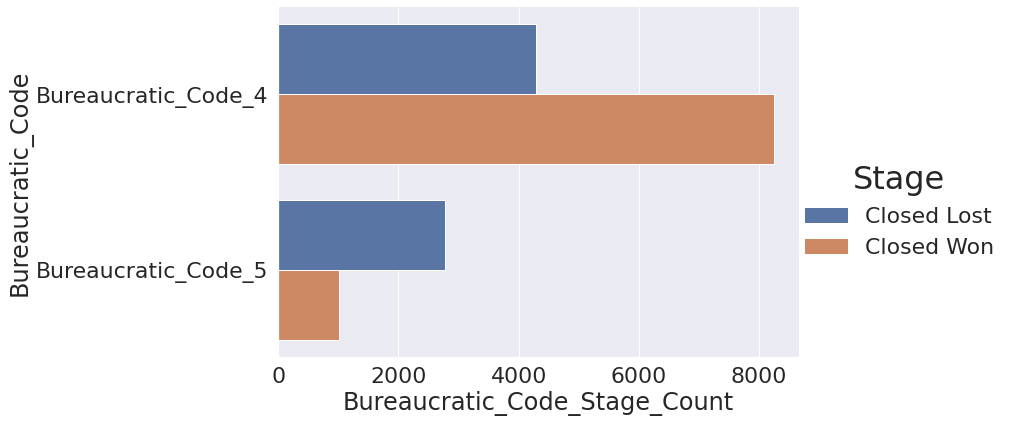

In [114]:
sns.set(font_scale=2) 
g=sns.catplot(x="Bureaucratic_Code_Stage_Count",y="Bureaucratic_Code",\
    data=Bureaucratic_Code_Stage_Count_mayor_200,hue="Stage",kind="bar",height=6, aspect=2)

plt.setp(g._legend.get_texts(), fontsize=22)
plt.setp(g._legend.get_title(), fontsize=32)
plt.show()

In [115]:
Bureaucratic_Code_Stage_Count_menos_200=Bureaucratic_Code_Stage_Count.loc[Bureaucratic_Code_Stage_Count["Bureaucratic_Code_Stage_Count"]<200]

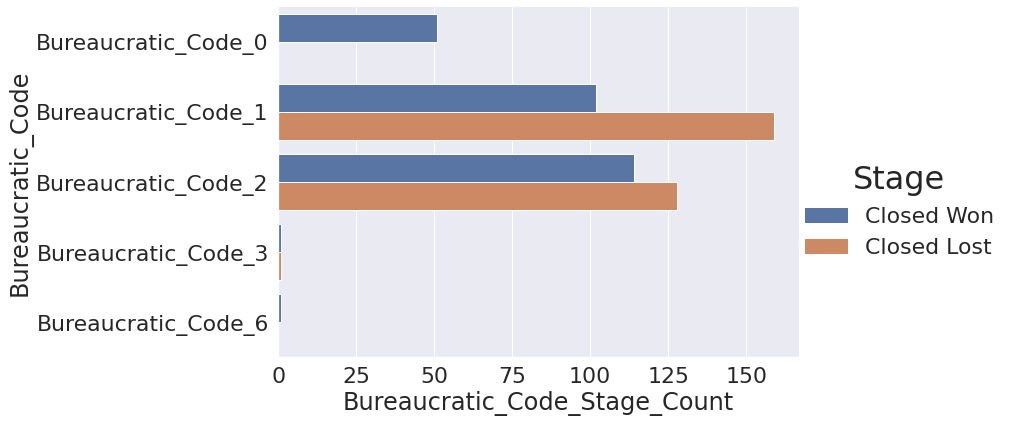

In [116]:
sns.set(font_scale=2) 
g=sns.catplot(x="Bureaucratic_Code_Stage_Count",y="Bureaucratic_Code",\
    data=Bureaucratic_Code_Stage_Count_menos_200,hue="Stage",kind="bar",height=6, aspect=2)

plt.setp(g._legend.get_texts(), fontsize=22)
plt.setp(g._legend.get_title(), fontsize=32)
plt.show()

puedo sacar mas conclusiones de aquellas ventas con codigo burocratio 4 que es mucho mas probable que se cierre una venta si se adquiere
este codigo y si el codigo es 5 es mas probable que se pierda la venta.De los demas codigos no puedo decir mucho ya que no poseo los datos suficentes para hacer una afirmacio.

UNIENDO

In [117]:
tp_terri_Acconun=tp[["Territory","Account_Name","Stage"]].merge(tp_top10,how="right",on="Territory")

In [118]:
tp_terri_Acconun

,Territory,Account_Name,Stage,cantidad_ventas
0,Japan,Account_Name_619,Closed Lost,5680
1,Japan,Account_Name_619,Closed Won,5680
2,Japan,Account_Name_1888,Closed Lost,5680
3,Japan,Account_Name_1888,Closed Lost,5680
4,Japan,Account_Name_1888,Closed Lost,5680
...,...,...,...,...
14440,Belgium,Account_Name_350,Closed Won,285
14441,Belgium,Account_Name_350,Closed Won,285
14442,Belgium,Account_Name_1100,Closed Won,285
14443,Belgium,Account_Name_1274,Closed Won,285


In [119]:
tp_terri_Acconun_=tp_terri_Acconun.groupby(["Territory","Account_Name","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cant"}).sort_values("cant",ascending=False).reset_index()#.head(20)#.unstack(fill_value=0)#.head(10)

In [120]:
tp_terri_Acconun_

,Territory,Account_Name,Stage,cant
0,Japan,Account_Name_1888,Closed Lost,1104
1,Japan,Account_Name_1888,Closed Won,1018
2,Japan,Account_Name_1836,Closed Won,795
3,Japan,Account_Name_1991,Closed Won,520
4,America,Account_Name_25,Closed Won,515
...,...,...,...,...
1843,Japan,Account_Name_1181,Closed Lost,1
1844,Japan,Account_Name_1181,Closed Won,1
1845,Germany,Account_Name_1459,Closed Lost,1
1846,Japan,Account_Name_1196,Closed Lost,1


In [121]:
tp_terri_Acconun_=tp_terri_Acconun_#.head(30)

In [122]:
tp_terri_Acconun_

,Territory,Account_Name,Stage,cant
0,Japan,Account_Name_1888,Closed Lost,1104
1,Japan,Account_Name_1888,Closed Won,1018
2,Japan,Account_Name_1836,Closed Won,795
3,Japan,Account_Name_1991,Closed Won,520
4,America,Account_Name_25,Closed Won,515
...,...,...,...,...
1843,Japan,Account_Name_1181,Closed Lost,1
1844,Japan,Account_Name_1181,Closed Won,1
1845,Germany,Account_Name_1459,Closed Lost,1
1846,Japan,Account_Name_1196,Closed Lost,1


In [123]:
tp_terri_Acconun_["data_normalize"]=normalize(tp_terri_Acconun_[["cant"]],axis=0)

In [124]:
tp_terri_Acconun_mayor_200=tp_terri_Acconun_.loc[tp_terri_Acconun_.cant>200]

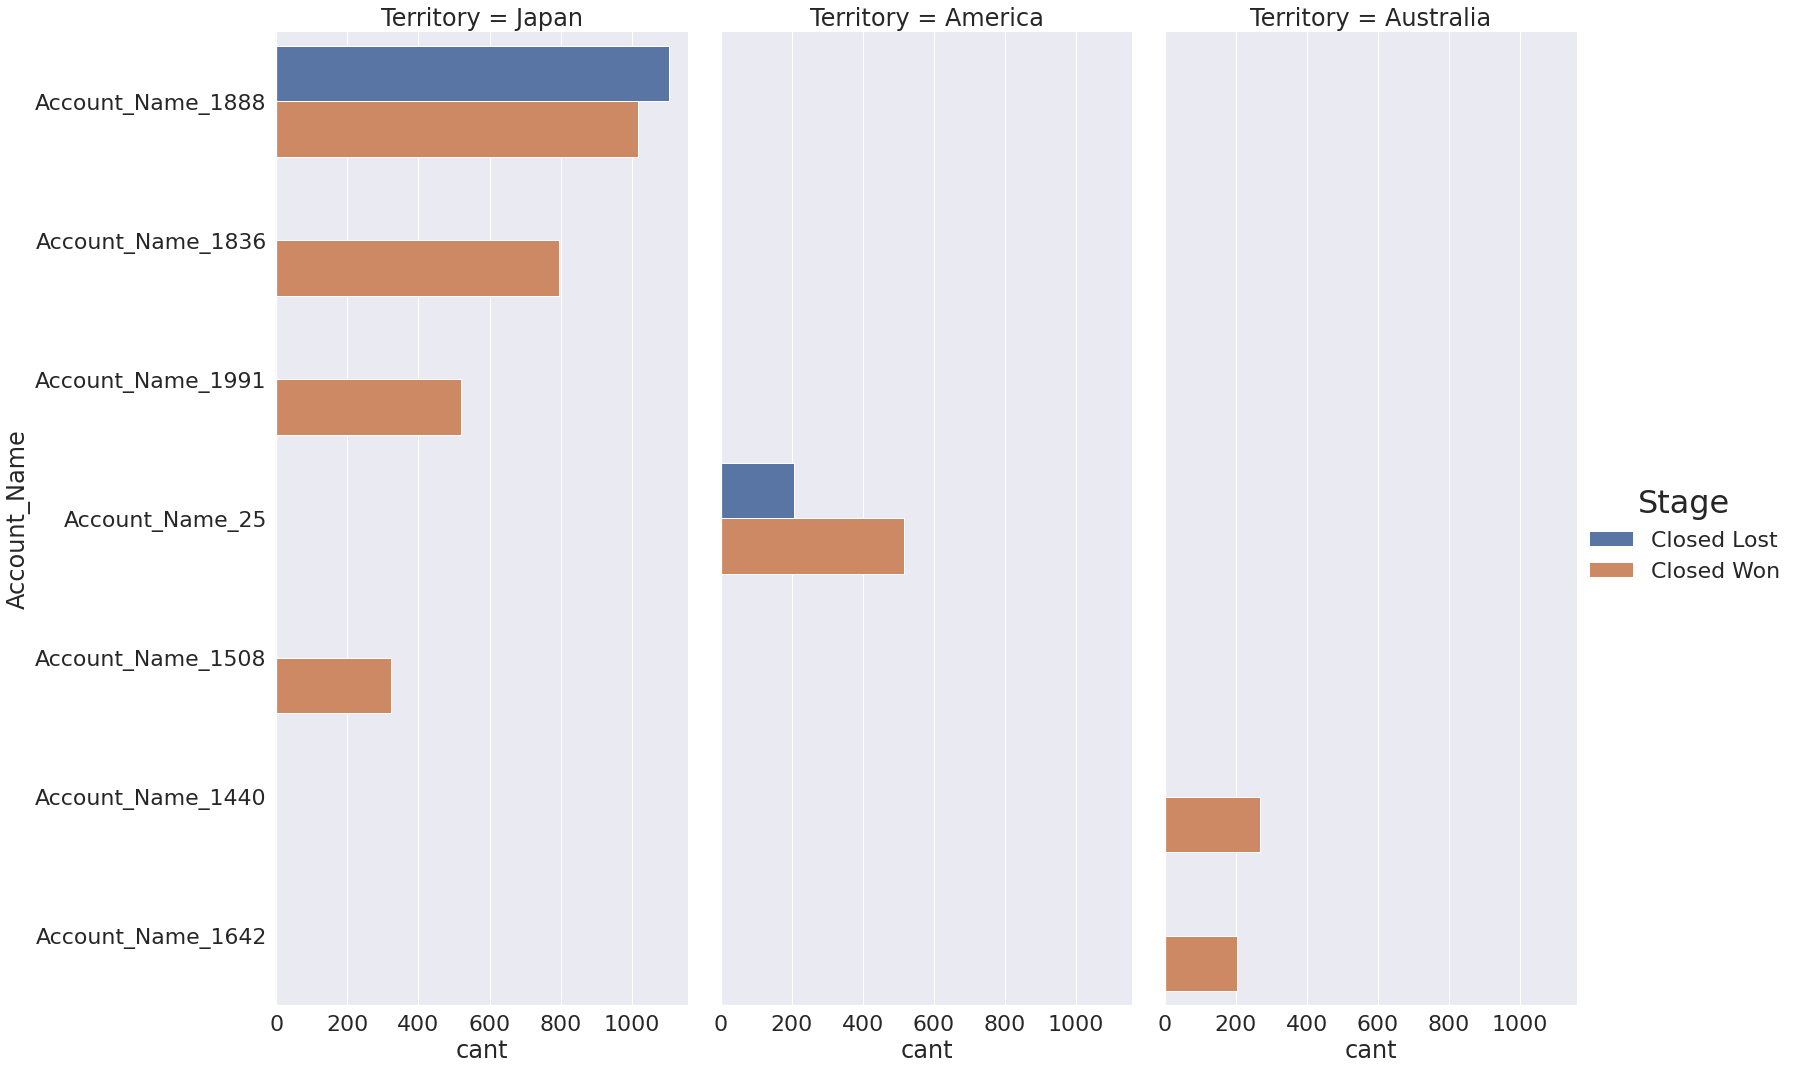

In [125]:
ax=sns.catplot(x="cant",y="Account_Name",col="Territory",\
   data=tp_terri_Acconun_mayor_200,hue="Stage",kind="bar",height=15, aspect=0.5)
plt.setp(ax._legend.get_texts(), fontsize=22)
plt.setp(ax._legend.get_title(), fontsize=32)
plt.show()

In [126]:
tp_terri_Acconun_menor_200=tp_terri_Acconun_.loc[tp_terri_Acconun_.cant<200].head(20)

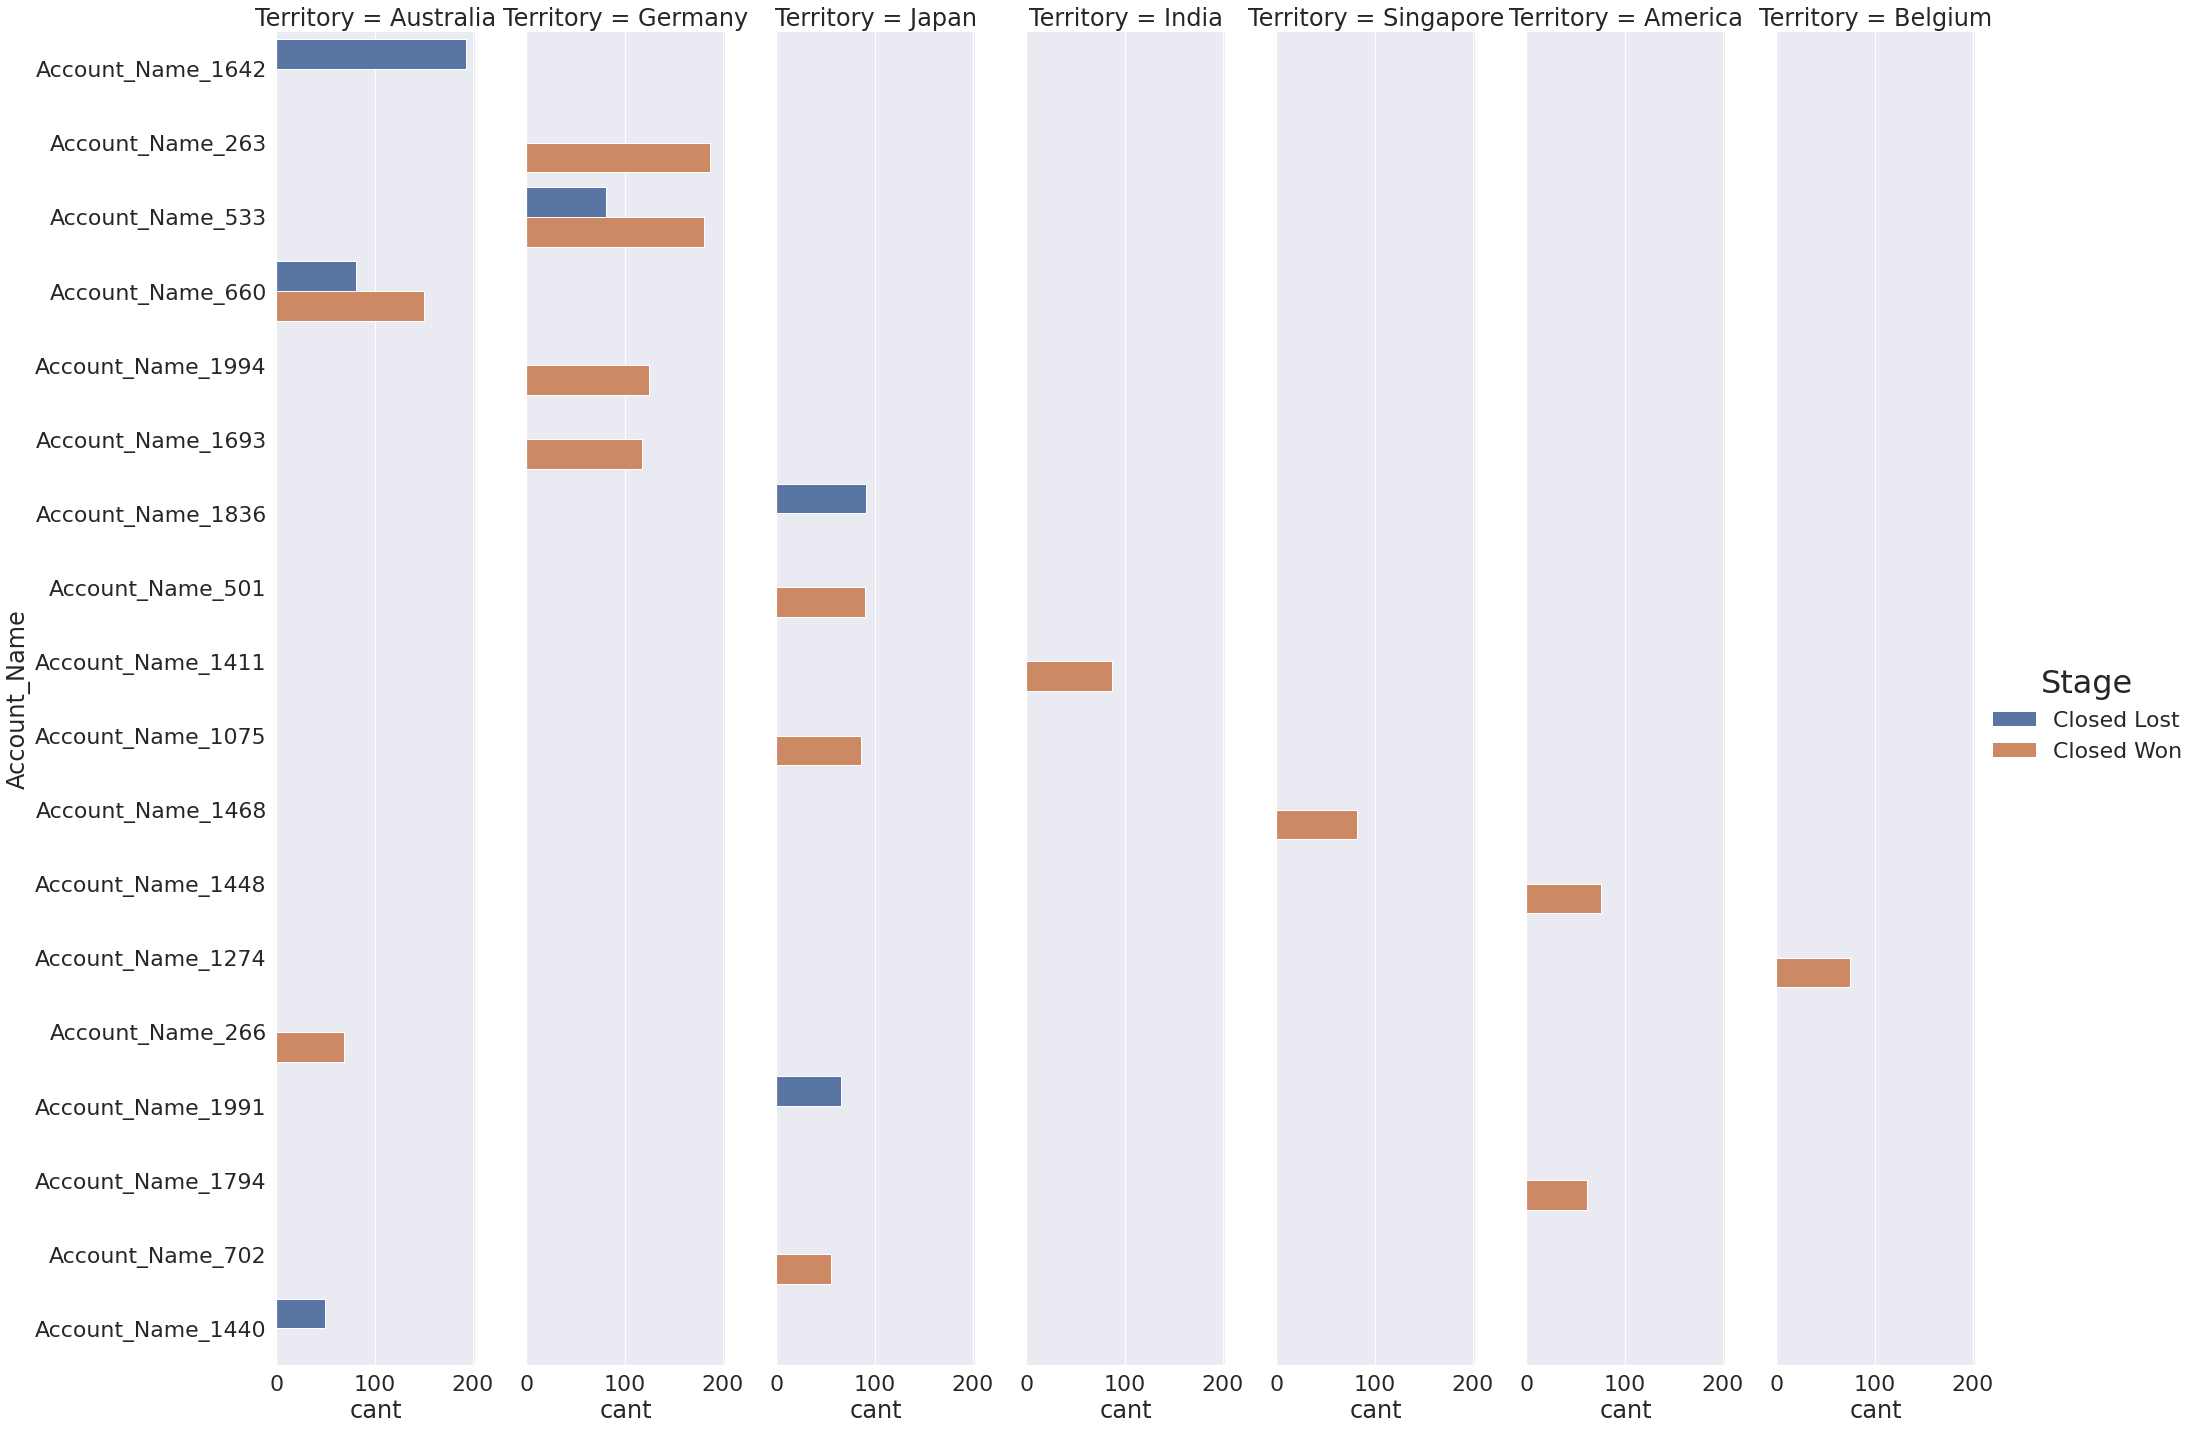

In [130]:
ax=sns.catplot(x="cant",y="Account_Name",col="Territory",\
   data=tp_terri_Acconun_menor_200,hue="Stage",kind="bar",height=20, aspect=0.2)
plt.setp(ax._legend.get_texts(), fontsize=22)
plt.setp(ax._legend.get_title(), fontsize=32)
plt.show()

In [131]:
tp_top10

,Territory,cantidad_ventas
0,Japan,5680
1,America,3045
2,Germany,1682
3,Australia,1208
4,India,809
5,Netherlands,533
6,France,449
7,Singapore,441
8,United Kingdom,313
9,Belgium,285


In [132]:
tp_TBS=tp[["Account_Name","Territory","Bureaucratic_Code_0_Approval","Bureaucratic_Code_0_Approved","Bureaucratic_Code","Stage"]]

In [133]:
tp_TBS=tp_TBS.merge(tp_top10,on="Territory",how="right")

In [134]:
tp_TBS_res=tp_TBS.groupby(["Territory","Bureaucratic_Code_0_Approval","Bureaucratic_Code_0_Approved","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"caunt_S"}).sort_values("caunt_S",ascending=False).unstack(fill_value=0)#.reset_index()#.head(50)

In [135]:
level_0=tp_TBS_res.columns.get_level_values(0)
level_1=tp_TBS_res.columns.get_level_values(1)

In [136]:
tp_TBS_res.columns=level_0+"_"+level_1

In [137]:
tp_TBS_res=tp_TBS_res.rename(columns={"caunt_S_Closed Lost":"Closed Lost","caunt_S_Closed Won":"Closed Won","caunt_S_Negotiation":"Negotiation","caunt_S_Proposal":"Proposal",\
                 "caunt_S_Qualification":"Qualification"})

In [138]:
tp_TBS_res.sort_values("Closed Won",ascending=False)

,,,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Territory,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,,,,,
Japan,0,0,1131,2847,0,0,0
America,0,0,510,807,0,0,0
Japan,1,1,336,677,0,7,0
Germany,0,0,249,572,0,0,0
America,1,1,644,415,8,5,0
Australia,1,1,271,324,0,4,0
Germany,1,1,285,319,0,0,0
Australia,0,0,103,249,0,0,0
America,1,0,413,243,0,0,0


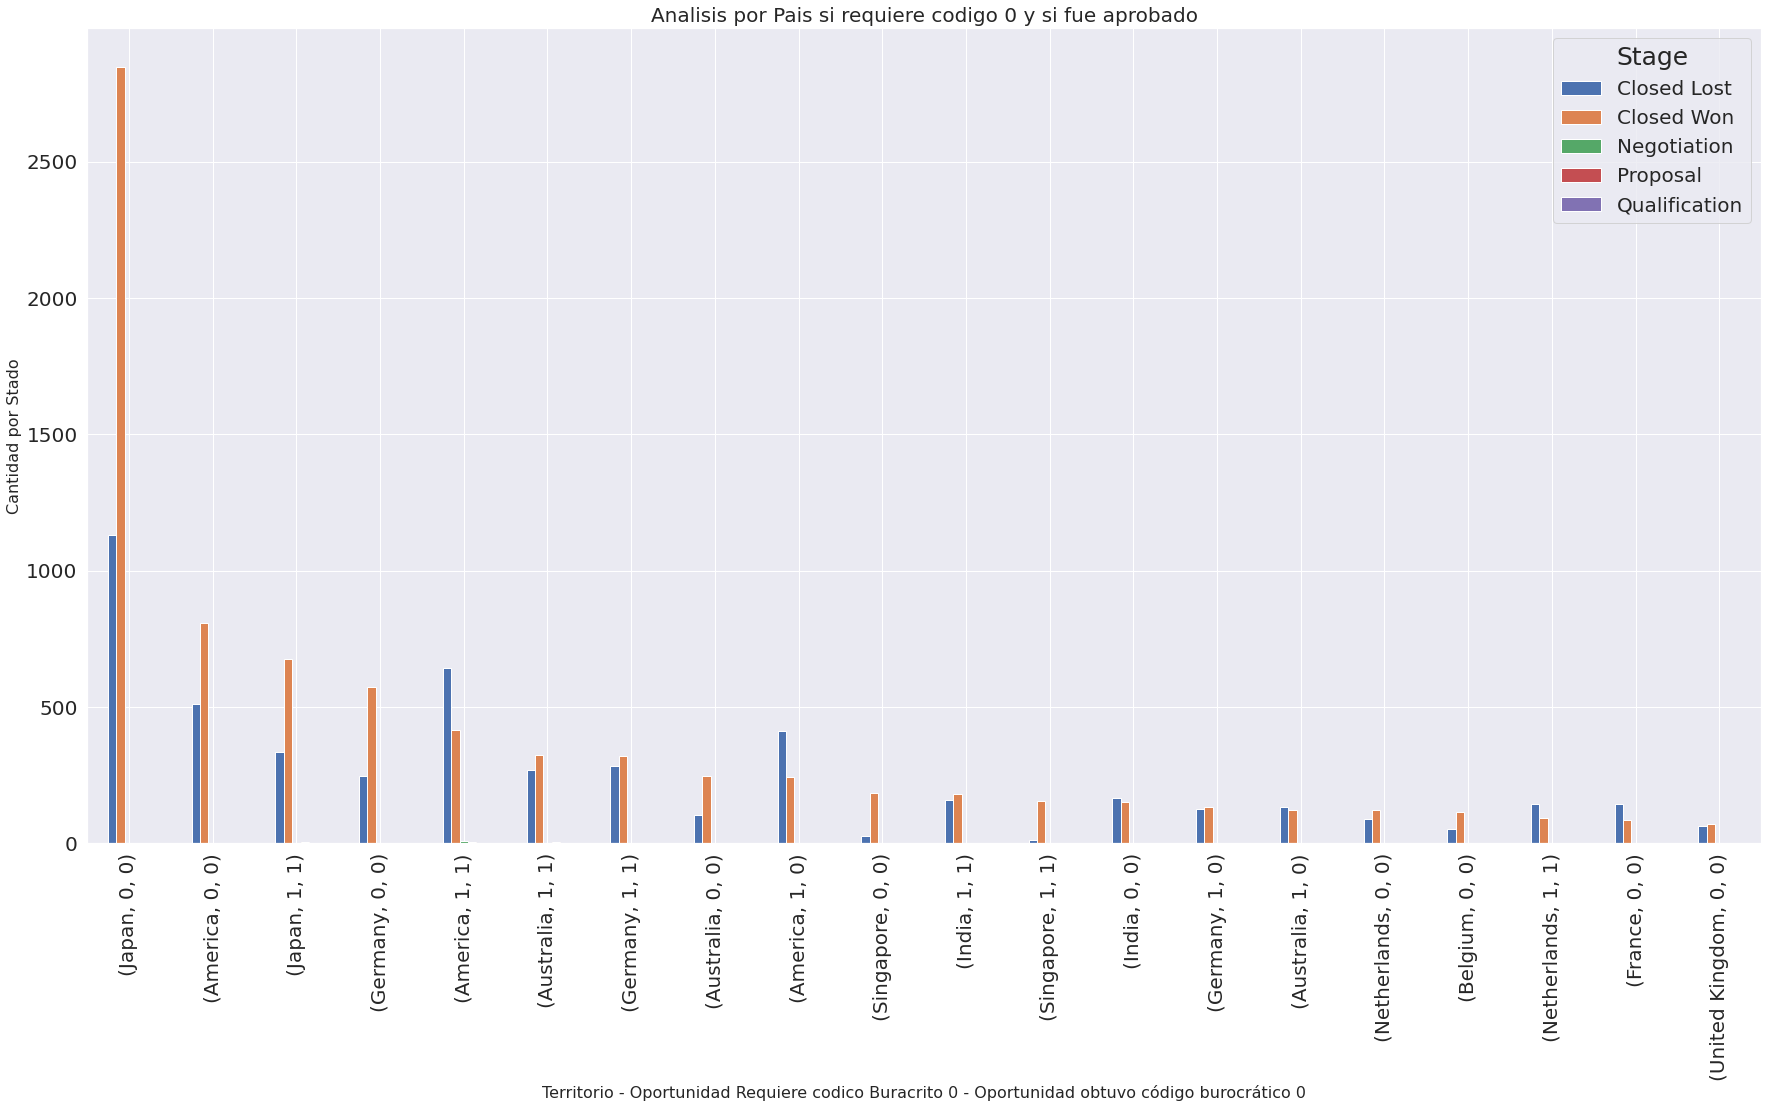

In [139]:
g=tp_TBS_res.sort_values("Closed Won",ascending=False).head(20).plot(kind='bar', figsize=(30,15) ,fontsize=20)
plt.title('Analisis por Pais si requiere codigo 0 y si fue aprobado', fontsize=20);
plt.xlabel('Territorio - Oportunidad Requiere codico Buracrito 0 - Oportunidad obtuvo código burocrático 0', fontsize=16);
plt.ylabel('Cantidad por Stado', fontsize=16)
plt.legend(title="Stage", fontsize=20, title_fontsize=25)
plt.show()

In [141]:
tp_account_burocratic=tp.groupby(["Account_Name","Bureaucratic_Code","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cant_stage"}).sort_values("cant_stage",ascending=False).head(20).unstack(fill_value=0)

In [142]:
l0=tp_account_burocratic.columns.get_level_values(0)
l1=tp_account_burocratic.columns.get_level_values(1)

In [143]:
tp_account_burocratic.columns=l0+"_"+l1

In [144]:
tp_account_burocratic

cant_stage_Closed Lost  \
Account_Name      Bureaucratic_Code                             
Account_Name_1888 Bureaucratic_Code_5                    1076   
                  Bureaucratic_Code_4                       0   
Account_Name_1836 Bureaucratic_Code_4                       0   
Account_Name_1991 Bureaucratic_Code_4                       0   
Account_Name_25   Bureaucratic_Code_4                     143   
Account_Name_1508 Bureaucratic_Code_4                       0   
Account_Name_1440 Bureaucratic_Code_4                       0   
Account_Name_931  Bureaucratic_Code_4                       0   
Account_Name_1642 Bureaucratic_Code_4                     178   
Account_Name_263  Bureaucratic_Code_4                       0   
Account_Name_660  Bureaucratic_Code_4                       0   
Account_Name_533  Bureaucratic_Code_4                       0   
Account_Name_1994 Bureaucratic_Code_4                       0   
Account_Name_1693 Bureaucratic_Code_4                       0   
Account_Name_1274 Bureaucratic_Code_4                       0   
Account_Name_501  Bureaucratic_Code_4                       0   
Account_Name_1757 Bureaucratic_Code_4                       0   
Account_Name_1411 Bureaucratic_Code_4                       0   

                                       cant_stage_Closed Won  
Account_Name      Bureaucratic_Code                           
Account_Name_1888 Bureaucratic_Code_5                      0  
                  Bureaucratic_Code_4                   1008  
Account_Name_1836 Bureaucratic_Code_4                    795  
Account_Name_1991 Bureaucratic_Code_4                    503  
Account_Name_25   Bureaucratic_Code_4                    459  
Account_Name_1508 Bureaucratic_Code_4                    321  
Account_Name_1440 Bureaucratic_Code_4                    220  
Account_Name_931  Bureaucratic_Code_4                    202  
Account_Name_1642 Bureaucratic_Code_4                    131  
Account_Name_263  Bureaucratic_Code_4                    177  
Account_Name_660  Bureaucratic_Code_4                    150  
Account_Name_533  Bureaucratic_Code_4                    140  
Account_Name_1994 Bureaucratic_Code_4                    110  
Account_Name_1693 Bureaucratic_Code_4                    108  
Account_Name_1274 Bureaucratic_Code_4                    100  
Account_Name_501  Bureaucratic_Code_4                     90  
Account_Name_1757 Bureaucratic_Code_4                     89  
Account_Name_1411 Bureaucratic_Code_4                     85

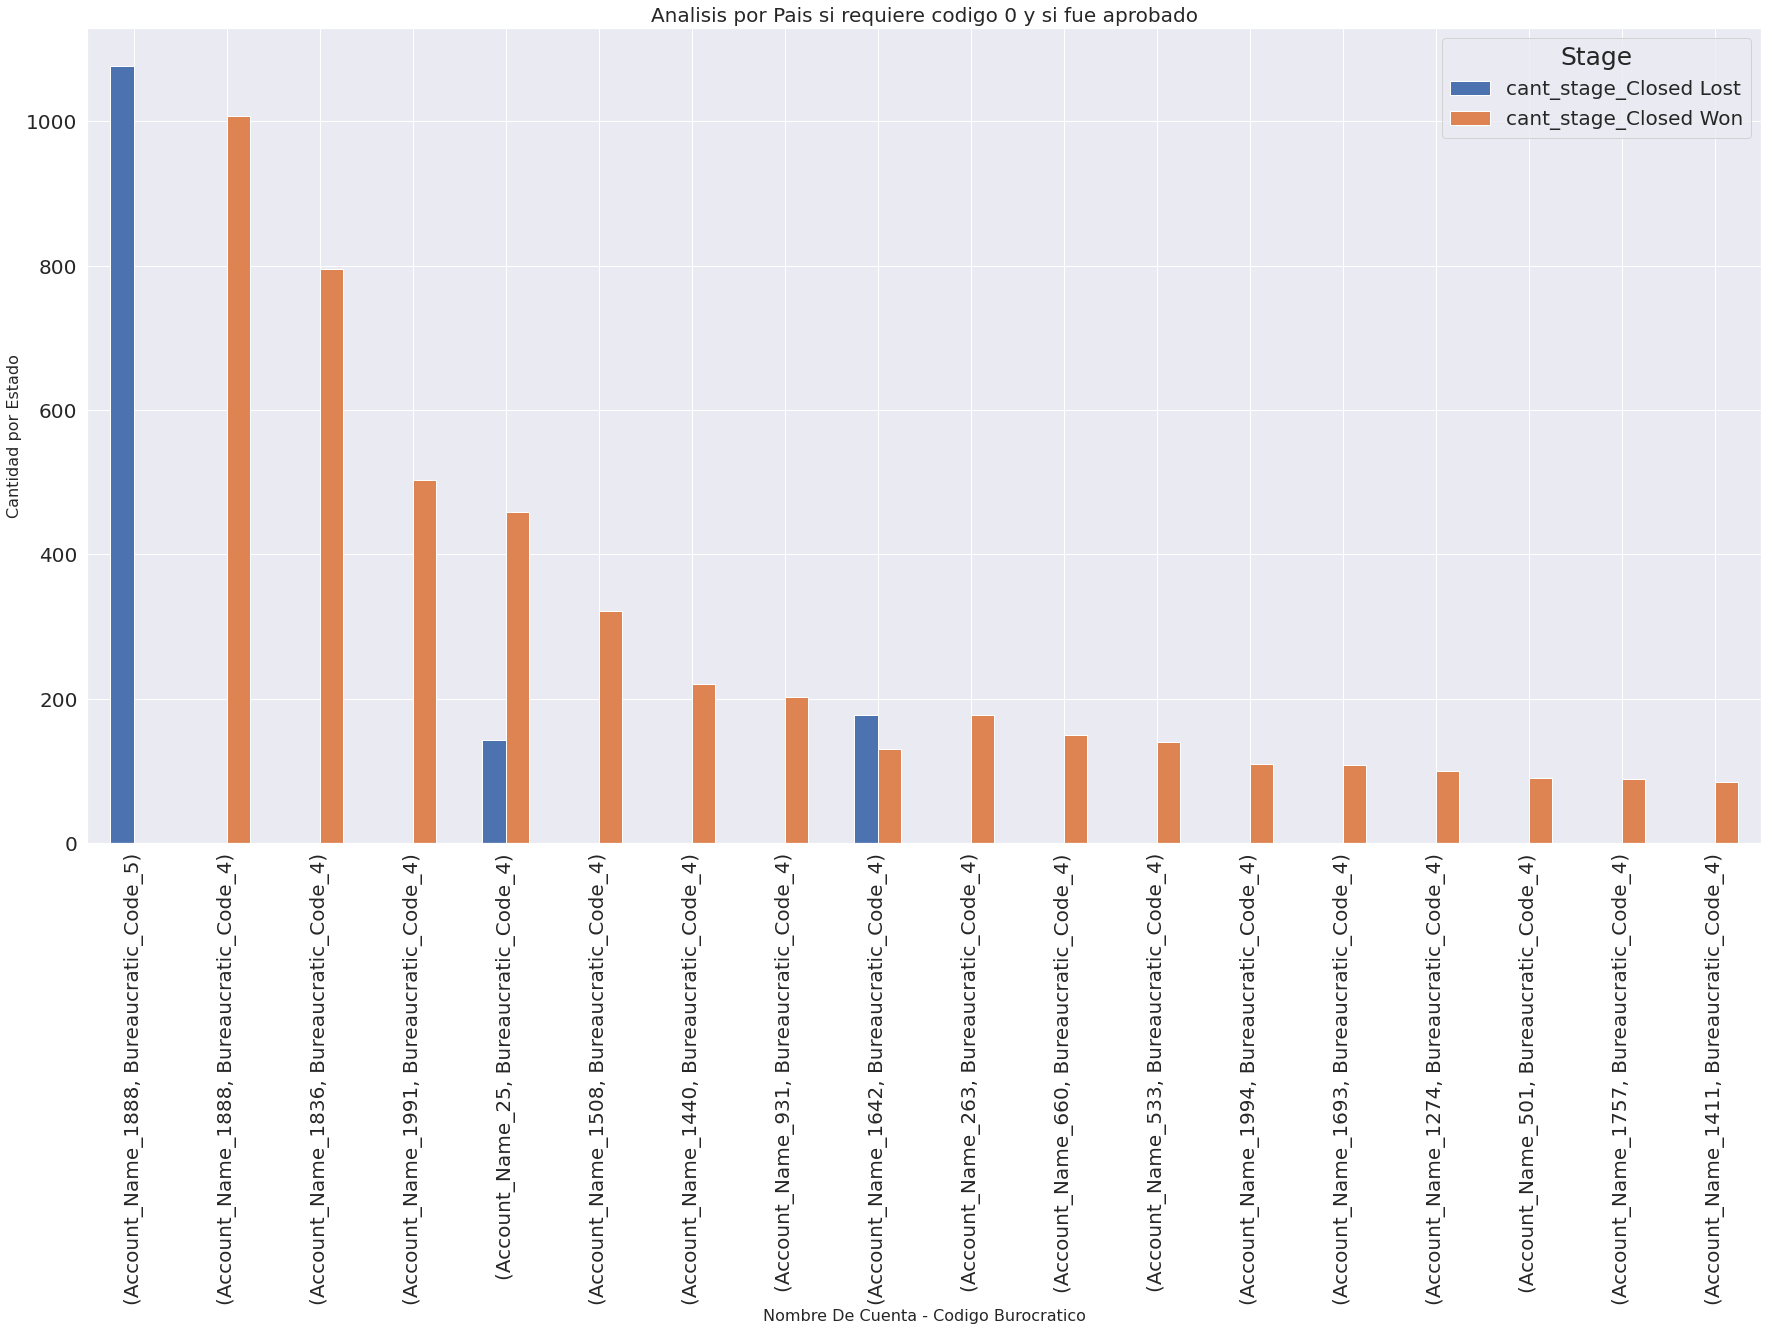

In [145]:
g=tp_account_burocratic.plot(kind='bar', figsize=(30,15) ,fontsize=20)
plt.title('Analisis por Pais si requiere codigo 0 y si fue aprobado', fontsize=20);
plt.xlabel('Nombre De Cuenta - Codigo Burocratico', fontsize=16);
plt.ylabel('Cantidad por Estado', fontsize=16)
plt.legend(title="Stage", fontsize=20, title_fontsize=25)
plt.show()

In [146]:
code_1_1=tp.loc[(tp.Bureaucratic_Code_0_Approval==1)&(tp.Bureaucratic_Code_0_Approved==1)].groupby(["Bureaucratic_Code_0_Approved","Bureaucratic_Code","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cant_stage"}).sort_values("cant_stage",ascending=False).reset_index()

In [147]:
code_1_1=code_1_1.loc[code_1_1.cant_stage>100]

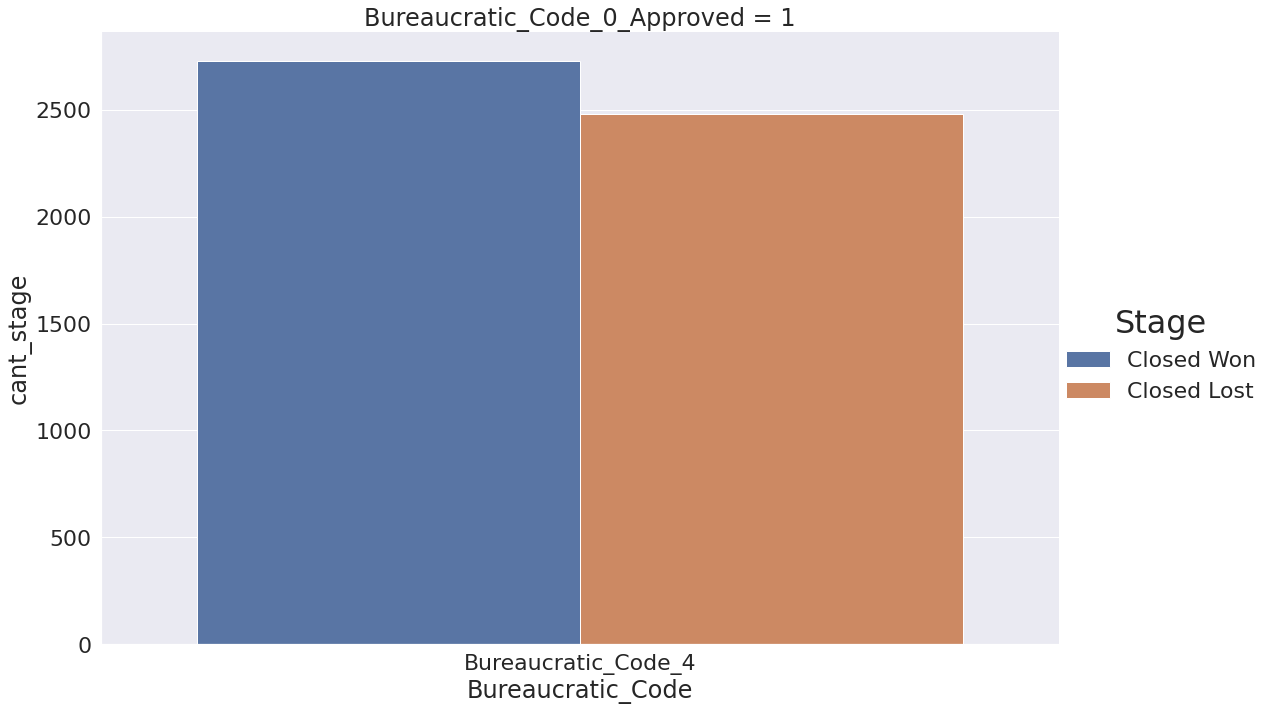

In [148]:
 
g=sns.catplot(x="Bureaucratic_Code",y="cant_stage",col="Bureaucratic_Code_0_Approved",\
    data=code_1_1,hue="Stage",kind="bar",height=10, aspect=1.5)

plt.setp(g._legend.get_texts(), fontsize=22)
plt.setp(g._legend.get_title(), fontsize=32)
plt.show()

In [149]:
code_1_0=tp.loc[(tp.Bureaucratic_Code_0_Approval==1)&(tp.Bureaucratic_Code_0_Approved==0)].groupby(["Bureaucratic_Code_0_Approved","Bureaucratic_Code","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cant_stage"}).sort_values("cant_stage",ascending=False).reset_index()

In [150]:
code_1_0

,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Stage,cant_stage
0,0,Bureaucratic_Code_5,Closed Lost,1718
1,0,Bureaucratic_Code_5,Closed Won,673
2,0,Bureaucratic_Code_2,Closed Lost,128
3,0,Bureaucratic_Code_2,Closed Won,114
4,0,Bureaucratic_Code_5,Qualification,11
5,0,Bureaucratic_Code_5,Proposal,9
6,0,Bureaucratic_Code_5,Negotiation,1


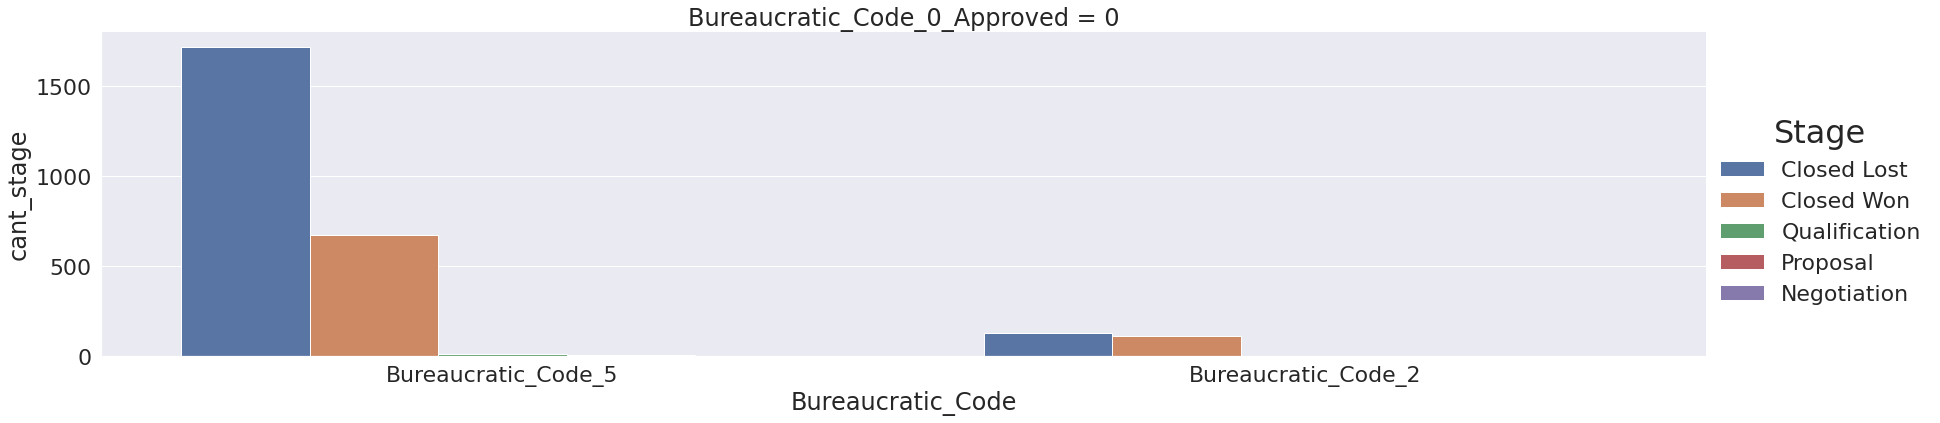

In [151]:
sns.set(font_scale=2) 
g=sns.catplot(x="Bureaucratic_Code",y="cant_stage",col="Bureaucratic_Code_0_Approved",\
    data=code_1_0,hue="Stage",kind="bar",height=6, aspect=4)

plt.setp(g._legend.get_texts(), fontsize=22)
plt.setp(g._legend.get_title(), fontsize=32)
plt.show()

In [166]:
code_0_0=tp.loc[tp.Bureaucratic_Code_0_Approval==0].groupby(["Bureaucratic_Code_0_Approved","Bureaucratic_Code","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cant_stage"}).sort_values("cant_stage",ascending=False).reset_index()

In [167]:
code_0_0

,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Stage,cant_stage
0,0,Bureaucratic_Code_4,Closed Won,5524
1,0,Bureaucratic_Code_4,Closed Lost,1812
2,0,Bureaucratic_Code_5,Closed Lost,1046
3,0,Bureaucratic_Code_5,Closed Won,327
4,0,Bureaucratic_Code_1,Closed Lost,103
5,0,Bureaucratic_Code_1,Closed Won,61
6,0,Bureaucratic_Code_0,Closed Won,15
7,0,Bureaucratic_Code_3,Closed Won,1


In [168]:
code_0_0=code_0_0.loc[code_0_0.cant_stage>100]

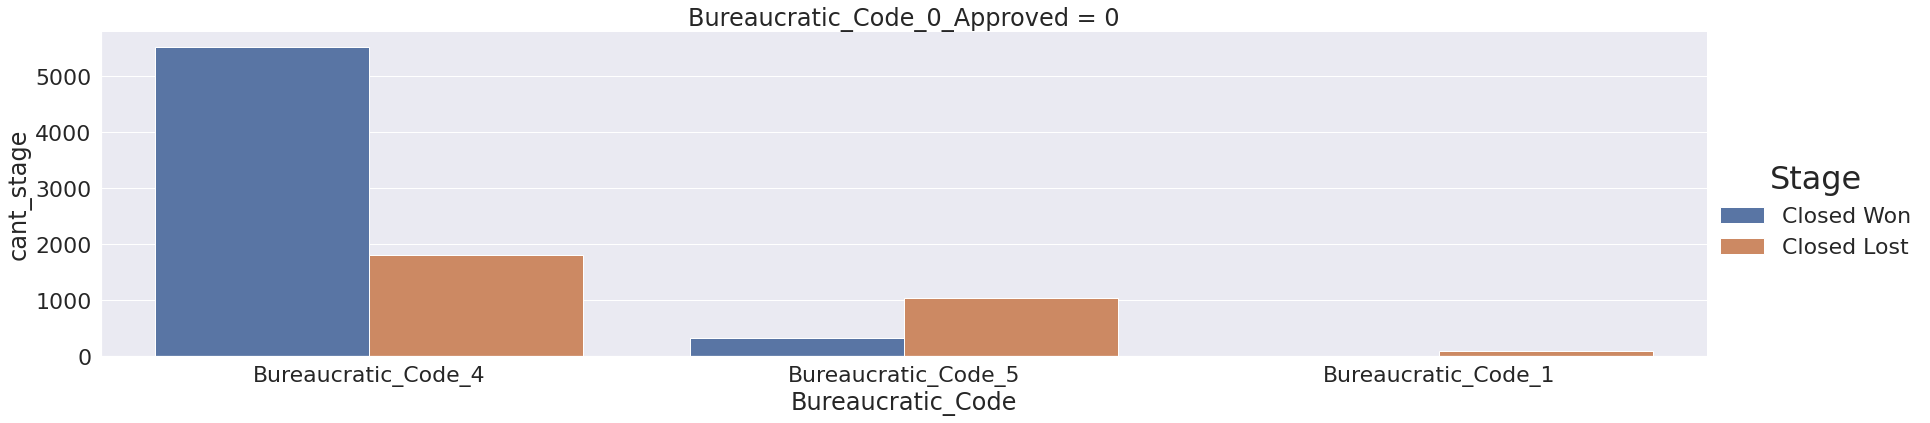

In [169]:
sns.set(font_scale=2) 
g=sns.catplot(x="Bureaucratic_Code",y="cant_stage",col="Bureaucratic_Code_0_Approved",\
    data=code_0_0,hue="Stage",kind="bar",height=6, aspect=4)

plt.setp(g._legend.get_texts(), fontsize=22)
plt.setp(g._legend.get_title(), fontsize=32)
plt.show()

In [170]:
tp_account_burocratic=tp.loc[tp.Bureaucratic_Code.str.contains("Bureaucratic_Code_5")|tp.Bureaucratic_Code.str.contains("Bureaucratic_Code_4")].groupby(["Account_Name","Bureaucratic_Code_0_Approval","Bureaucratic_Code_0_Approved","Bureaucratic_Code","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cant_stage"}).sort_values("cant_stage",ascending=False).reset_index()

In [171]:
tp_account_burocratic.head(30)

,Account_Name,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Stage,cant_stage
0,Account_Name_1888,0,0,Bureaucratic_Code_4,Closed Won,880
1,Account_Name_1836,0,0,Bureaucratic_Code_4,Closed Won,782
2,Account_Name_1888,0,0,Bureaucratic_Code_5,Closed Lost,755
3,Account_Name_1991,0,0,Bureaucratic_Code_4,Closed Won,323
4,Account_Name_1888,1,0,Bureaucratic_Code_5,Closed Lost,321
5,Account_Name_25,0,0,Bureaucratic_Code_4,Closed Won,285
6,Account_Name_1508,0,0,Bureaucratic_Code_4,Closed Won,239
7,Account_Name_1991,1,1,Bureaucratic_Code_4,Closed Won,180
8,Account_Name_931,1,1,Bureaucratic_Code_4,Closed Won,176
9,Account_Name_1440,1,1,Bureaucratic_Code_4,Closed Won,175


In [188]:
tp_account_burocratic_mayor_200=tp_account_burocratic.loc[tp_account_burocratic.cant_stage>200]
tp_account_burocratic_menor_200=tp_account_burocratic.loc[tp_account_burocratic.cant_stage<200]

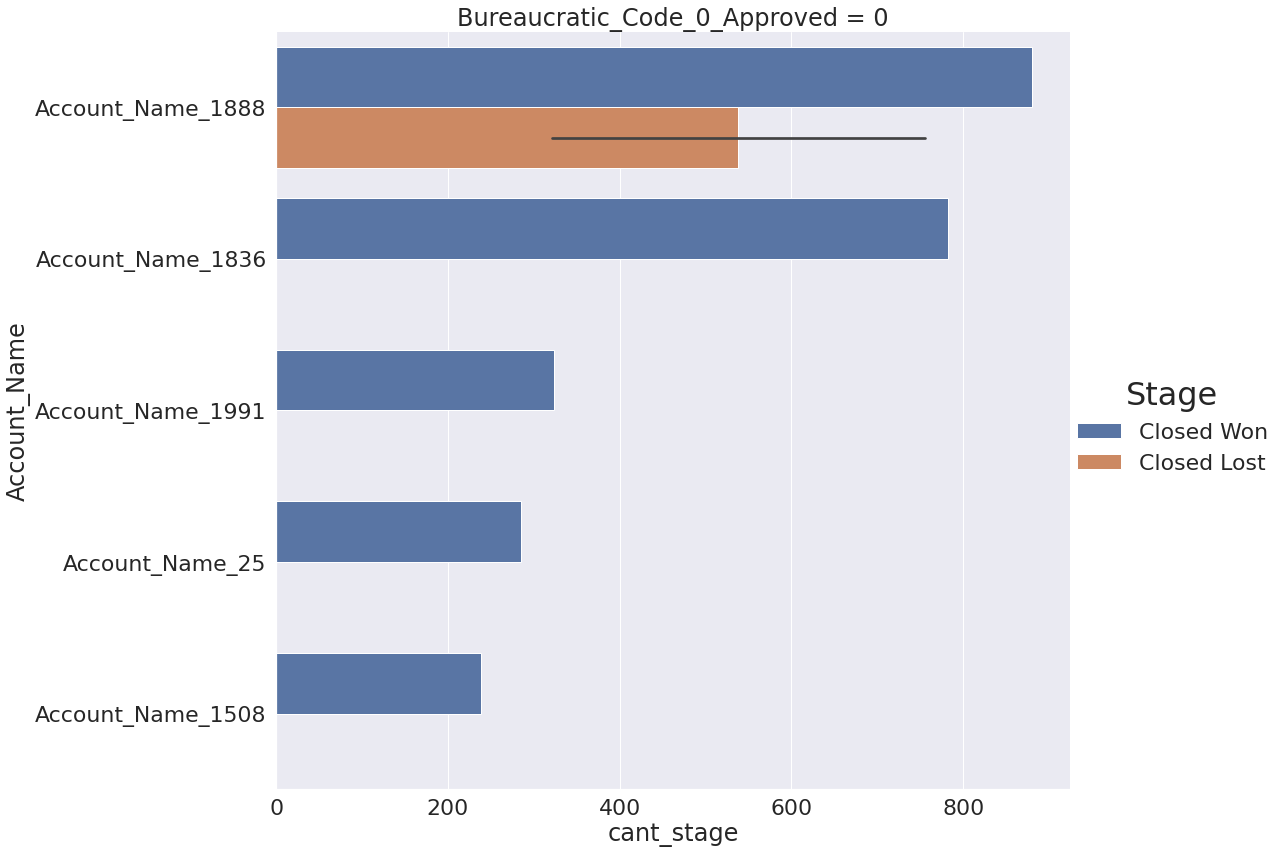

In [212]:

g=sns.catplot(x="cant_stage",y="Account_Name",col="Bureaucratic_Code_0_Approved",\
    data=tp_account_burocratic_mayor_200,hue="Stage",kind="bar",height=12, aspect=1.3)

plt.setp(g._legend.get_texts(), fontsize=22)
plt.setp(g._legend.get_title(), fontsize=32)
plt.show()

In [221]:
tp_account_burocratic_menor_200_00=tp_account_burocratic_menor_200.loc[(tp_account_burocratic_menor_200.Bureaucratic_Code_0_Approved==0)&(tp_account_burocratic_menor_200.Bureaucratic_Code_0_Approval==0)].head(25)

In [222]:
tp_account_burocratic_menor_200_00

,Account_Name,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Stage,cant_stage
12,Account_Name_263,0,0,Bureaucratic_Code_4,Closed Won,130
14,Account_Name_25,0,0,Bureaucratic_Code_4,Closed Lost,116
15,Account_Name_660,0,0,Bureaucratic_Code_4,Closed Won,113
16,Account_Name_1693,0,0,Bureaucratic_Code_4,Closed Won,98
17,Account_Name_1994,0,0,Bureaucratic_Code_4,Closed Won,87
18,Account_Name_533,0,0,Bureaucratic_Code_4,Closed Won,87
21,Account_Name_1274,0,0,Bureaucratic_Code_4,Closed Won,77
23,Account_Name_1448,0,0,Bureaucratic_Code_4,Closed Won,66
27,Account_Name_686,0,0,Bureaucratic_Code_4,Closed Won,56
30,Account_Name_271,0,0,Bureaucratic_Code_4,Closed Won,51


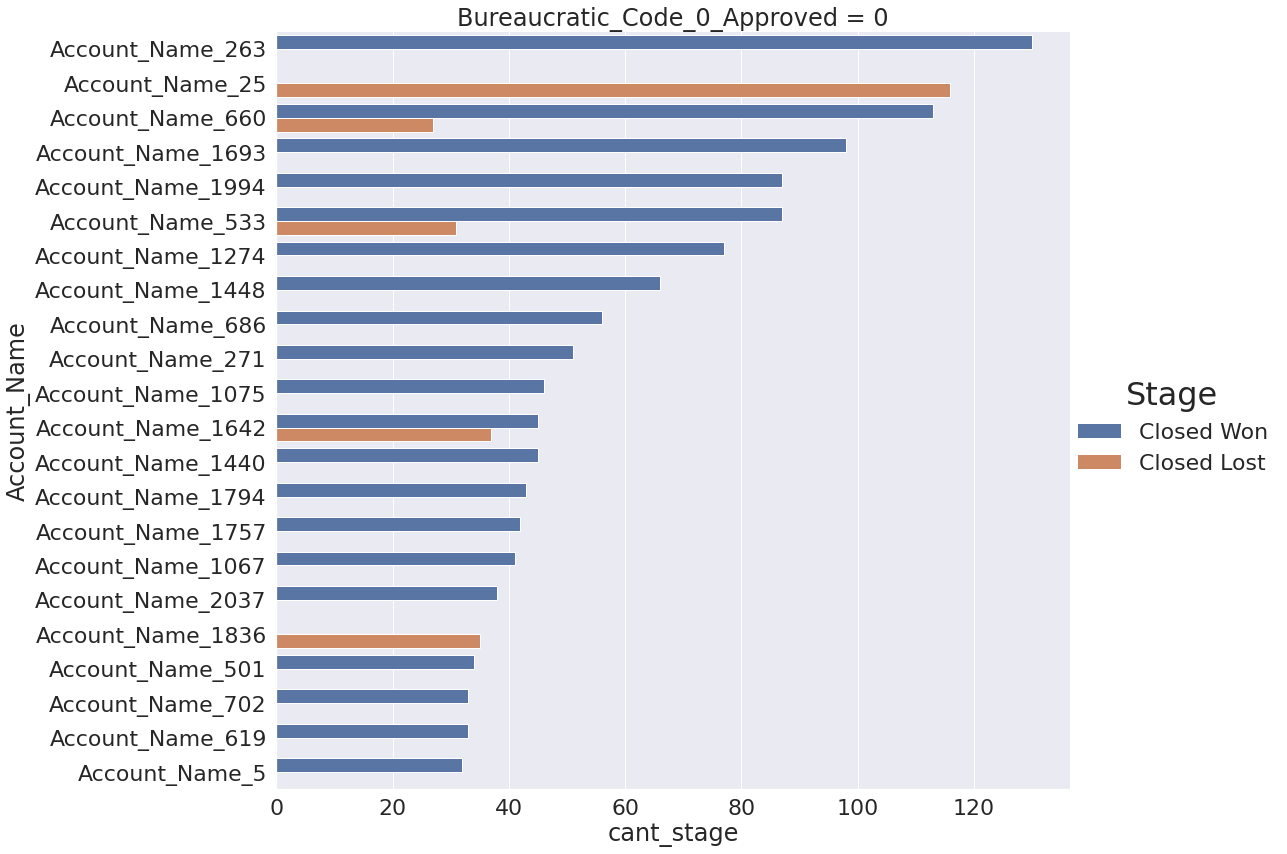

In [224]:
g=sns.catplot(x="cant_stage",y="Account_Name",col="Bureaucratic_Code_0_Approved",\
    data=tp_account_burocratic_menor_200_00,hue="Stage",kind="bar",height=12, aspect=1.3)

plt.setp(g._legend.get_texts(), fontsize=22)
plt.setp(g._legend.get_title(), fontsize=32)
plt.show()

SI NO SE REQUIERE UN CODIGO BUROCRATICO 0 TENEMOS UNA ALTA PROBABILIDAD DE CERRAR DE MANERA EXITOSA LAS VENTAS, VEMOS QUE LOS CLIENTES CON MAYOR VENTA EXITOSA CON CANTIDAD
MAYOR A 200 TODOS NO REQUERIAN CODIGO BUROCRATICO Y PARA AQUELLOS CLIENTES CON UNAS VENTAS MENORES A 200 LA TENDENCIA ES LA MISMA DE CERRAR DE MANERA EXITOSA
SALVO PARA LOS CLIENTES CON NOMBRE DE CUENTA 660 - 1642 - 25 QUE SON CON LOS QUE NO PODEMOS AFIRMAR TAN CLARAMENTE SI PODEMOS CERRAR DE MANERA EXITOSA O NO UNA VENTA,
POR LA PROPORCION DE LOS ESTADOS.

In [223]:
tp_account_burocratic_menor_200_11=tp_account_burocratic_menor_200.loc[(tp_account_burocratic_menor_200.Bureaucratic_Code_0_Approved==1)&(tp_account_burocratic_menor_200.Bureaucratic_Code_0_Approval==1)].head(25)

In [217]:
tp_account_burocratic_menor_200_11

,Account_Name,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Stage,cant_stage
7,Account_Name_1991,1,1,Bureaucratic_Code_4,Closed Won,180
8,Account_Name_931,1,1,Bureaucratic_Code_4,Closed Won,176
9,Account_Name_1440,1,1,Bureaucratic_Code_4,Closed Won,175
10,Account_Name_25,1,1,Bureaucratic_Code_4,Closed Won,174
11,Account_Name_1642,1,1,Bureaucratic_Code_4,Closed Lost,141
13,Account_Name_1888,1,1,Bureaucratic_Code_4,Closed Won,128
19,Account_Name_1642,1,1,Bureaucratic_Code_4,Closed Won,86
20,Account_Name_1508,1,1,Bureaucratic_Code_4,Closed Won,82
22,Account_Name_1468,1,1,Bureaucratic_Code_4,Closed Won,69
26,Account_Name_1411,1,1,Bureaucratic_Code_4,Closed Won,61


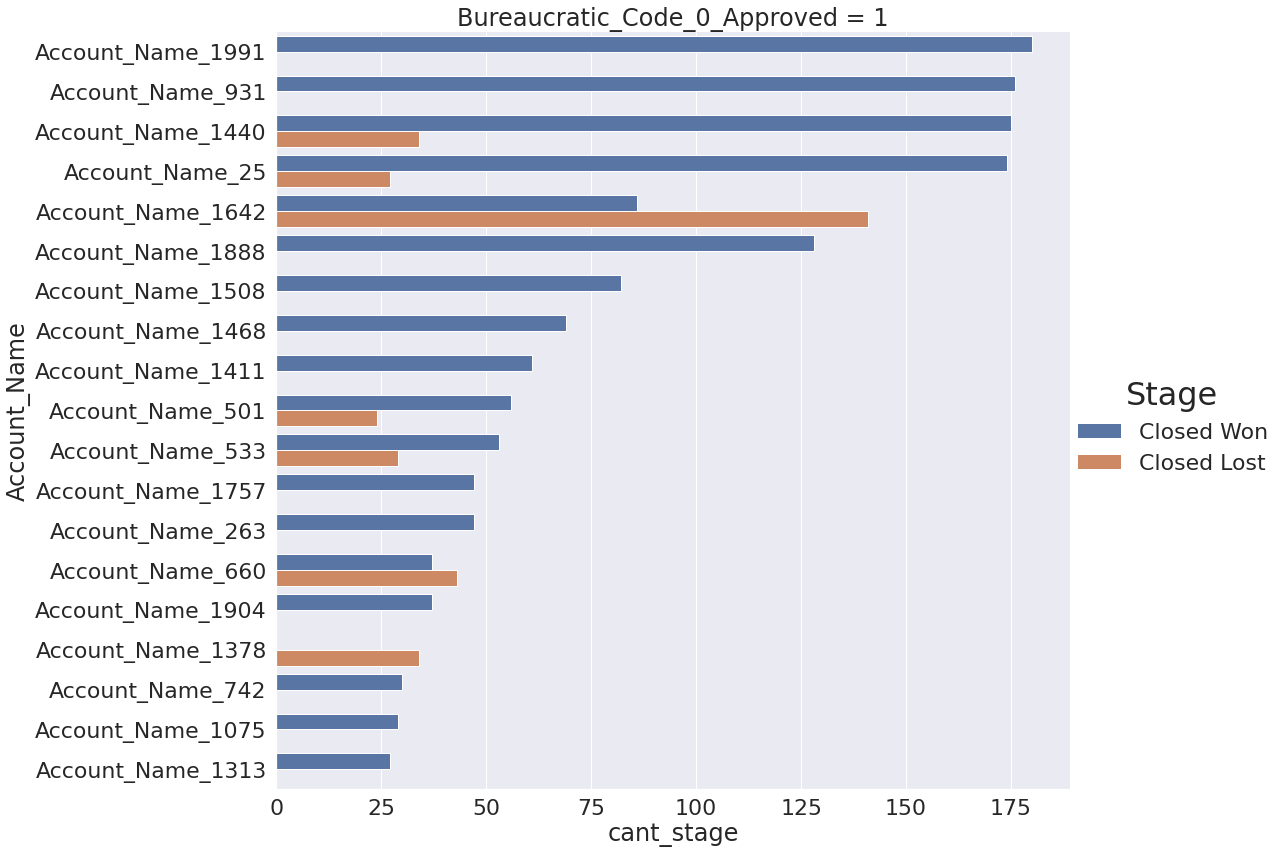

In [204]:
g=sns.catplot(x="cant_stage",y="Account_Name",col="Bureaucratic_Code_0_Approved",\
    data=tp_account_burocratic_menor_200_11,hue="Stage",kind="bar",height=12, aspect=1.3)

plt.setp(g._legend.get_texts(), fontsize=22)
plt.setp(g._legend.get_title(), fontsize=32)
plt.show()

vemos como claramente 

In [218]:
tp_account_burocratic_menor_200_10=tp_account_burocratic_menor_200.loc[(tp_account_burocratic_menor_200.Bureaucratic_Code_0_Approved==0)&(tp_account_burocratic_menor_200.Bureaucratic_Code_0_Approval==1)].head(25)

In [219]:
tp_account_burocratic_menor_200_10

,Account_Name,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Stage,cant_stage
24,Account_Name_1642,1,0,Bureaucratic_Code_5,Closed Won,65
25,Account_Name_25,1,0,Bureaucratic_Code_5,Closed Lost,64
31,Account_Name_1836,1,0,Bureaucratic_Code_5,Closed Lost,49
35,Account_Name_25,1,0,Bureaucratic_Code_5,Closed Won,46
46,Account_Name_533,1,0,Bureaucratic_Code_5,Closed Won,37
56,Account_Name_266,1,0,Bureaucratic_Code_5,Closed Won,30
59,Account_Name_1440,1,0,Bureaucratic_Code_5,Closed Won,28
63,Account_Name_961,1,0,Bureaucratic_Code_5,Closed Lost,27
64,Account_Name_1983,1,0,Bureaucratic_Code_5,Closed Lost,26
71,Account_Name_433,1,0,Bureaucratic_Code_5,Closed Lost,24


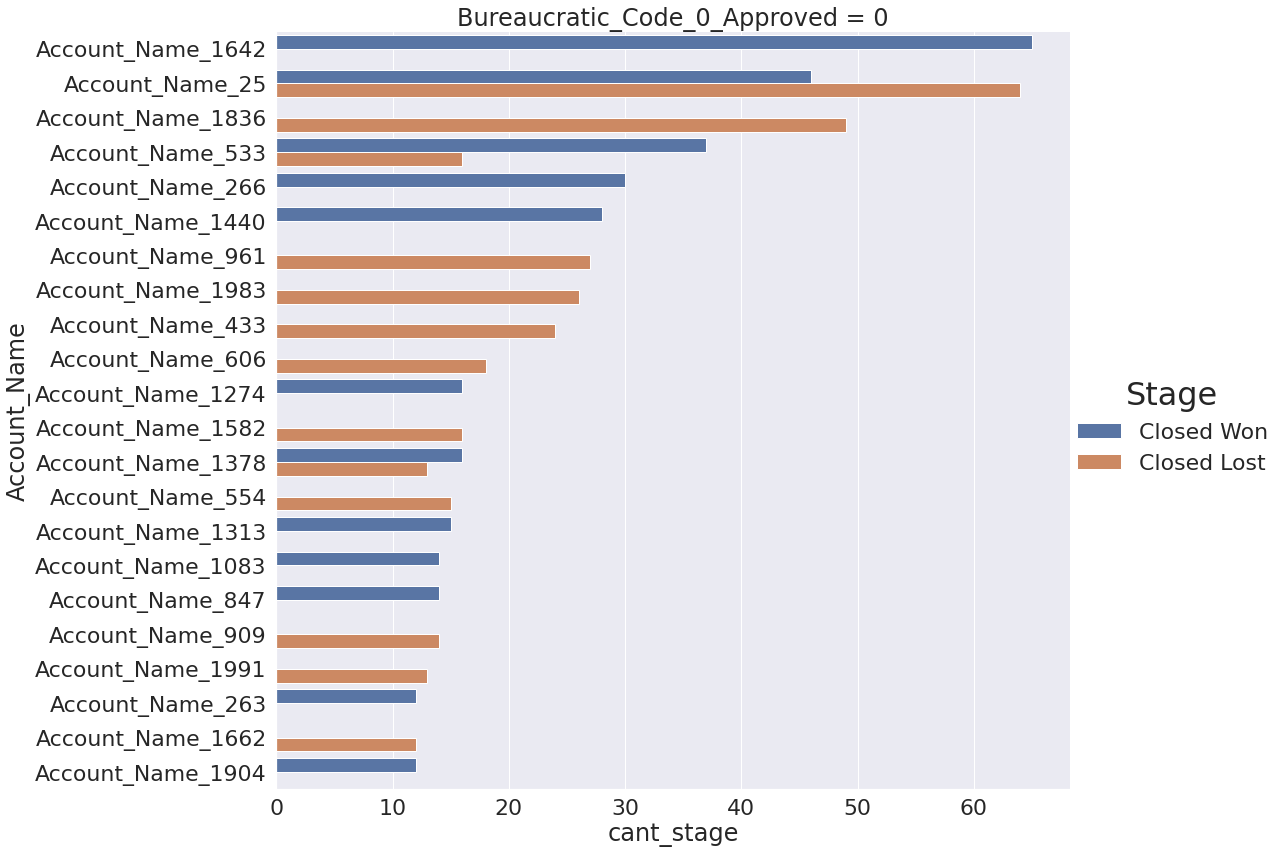

In [220]:
g=sns.catplot(x="cant_stage",y="Account_Name",col="Bureaucratic_Code_0_Approved",\
    data=tp_account_burocratic_menor_200_10,hue="Stage",kind="bar",height=12, aspect=1.3)

plt.setp(g._legend.get_texts(), fontsize=22)
plt.setp(g._legend.get_title(), fontsize=32)
plt.show()

In [ ]:
VEMOS QUE PARA AQUELLAS VENTAS QUE SI REQUIERN UN CODIGO BUROCRATICO  Y NO SE LES OTORGO DICHO CODIGO ES MUCHO MAS PROBABLE NO COMPLETAR UNA VENTA DE MANERA EXITOSA 
DE AQUELLAS QUE SI SE LES OTORGO SALVO PARA EL CLIENTE 1642 QUE SI REQUIERE CODIGO Y NO SE LE DA ES MAS PROBABLE PARTICULARMENTE EN EL COMPLETAR LA VENTA 
DE FORMA EXITOSA